In [10]:
from imblearn.metrics import geometric_mean_score
import numpy as np
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics
np.random.seed(13)
from sklearn import svm
import pandas as pd
import matplotlib.pyplot as plt
import math
from __future__ import division
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize
from stockstats import StockDataFrame 
from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data


files=['AAPL','AMZN','PEP','GOOGL','MSFT','FB','INTC','CSCO','CMCSA','NVDA','NFLX','BKNG','ADBE','AMGN','TXN','AVGO','PYPL','GILD','COST','QCOM']       


prices=list()
for file in files:
    param = {
        'q': file, # Stock symbol (ex: "AAPL")
        'i': "900", # Interval size in seconds ("86400" = 1 day intervals)
        'x': "NASD", # INDEXNASDAQStock exchange symbol on which stock is traded (ex: "NASD")
        'p': "2Y" # Period (Ex: "1Y" = 1 year)
        }
    #priceData = get_price_data(param)
    #stock = StockDataFrame.retype(priceData)
    #price = pd.DataFrame(stock)
    #string=['close_2_sma','close_4_sma','close_6_sma','close_8_sma','close_10_sma','close_12_sma','close_14_sma','close_16_sma','close_18_sma','pdi','mdi','dx','adx','adxr','cr','cr-ma1','cr-ma2','cr-ma3','boll','boll_ub','boll_lb','volume_-2_d','volume_-4_d','volume_-6_d','volume_-8_d','volume_-10_d','volume_-12_d','macd','macds','macdh','kdjk','kdjd','kdjj','tr','atr','wr_2','wr_10','wr_6','wr_8','wr_12','wr_14','close_-2_d','close_-4_d','close_-6_d','close_-8_d','close_-10_d','close_-12_d','close_-14_d','close_-16_d','rsi_2','rsi_4','rsi_6','rsi_8','rsi_10','rsi_12','rsi_14','rsi_16']
    #string=['close_2_sma','close_4_sma','close_6_sma','close_8_sma','close_10_sma','close_12_sma','close_14_sma','close_16_sma','close_18_sma','pdi','mdi','dx','adx','adxr','cr','cr-ma1','cr-ma2','cr-ma3','boll','boll_ub','boll_lb','volume_-2_d','volume_-4_d','volume_-6_d','volume_-8_d','volume_-10_d','volume_-12_d','macd','macds','macdh','kdjk','kdjd','kdjj','tr','atr','wr_2','wr_10','wr_6','wr_8','wr_12','wr_14','close_-2_d','close_-4_d','close_-6_d','close_-8_d','close_-10_d','close_-12_d','close_-14_d','close_-16_d','rsi_2','rsi_4','rsi_6','rsi_8','rsi_10','rsi_12','rsi_14','rsi_16']
    #stock.get(string)
    price= pd.read_csv('/home/andrea/Desktop/NLFF/TechnicalDatasetUpdated/'+file+'.csv')
    price=price.drop(['Unnamed: 0'],axis=1)
    print(price)
    
    #['macd','macds', 'boll_ub', 'boll_lb','rsi_6','rsi_12','vr_6_sma','wr_10','wr_6''close_10_sma''tr''middle_{}_sma'
    #df['dma'] = df['close_10_sma'] - df['close_50_sma'] pdi'] = cls._get_pdi(df, 14)df['mdi'] = cls._get_mdi(df, 14)
    #df['dx'] = cls._get_dx(df, 14) df['adx'] = df['dx_6_ema'] df['adxr'] = df['adx_6_ema']]
    #

    prices.append(price)

          open      high       low     close   volume  close_2_sma  \
0     159.4792  159.6300  158.7700  159.0900  1400128    159.09000   
1     159.1000  159.3800  158.9000  159.2650  1009525    159.17750   
2     159.2700  159.7300  159.2050  159.2200  1104813    159.24250   
3     159.2152  159.4353  159.2150  159.2600   546638    159.24000   
4     159.2600  159.5300  159.2600  159.4350   556516    159.34750   
5     159.4400  159.6000  159.3200  159.5040   562634    159.46950   
6     159.5000  159.5067  159.2100  159.3000   478202    159.40200   
7     159.2950  159.5000  159.1500  159.4646   537703    159.38230   
8     159.4800  159.5000  159.2500  159.2700   338905    159.36730   
9     159.2700  159.3800  159.2000  159.3200   372649    159.29500   
10    159.3200  159.4200  159.1300  159.1400   353429    159.23000   
11    159.1499  159.3100  159.0800  159.1576   278415    159.14880   
12    159.1600  159.2500  159.0500  159.2000   310227    159.17880   
13    159.2000  159.

          open      high       low     close   volume  close_2_sma  \
0     118.6600  118.7100  118.6600  118.7000    43248    118.70000   
1     118.9500  119.1200  117.5600  117.8200    69261    118.26000   
2     117.8200  118.3200  117.7700  118.2300   163492    118.02500   
3     118.2200  118.4200  118.0900  118.1800    49993    118.20500   
4     118.1800  118.2452  118.0600  118.2400    40796    118.21000   
5     118.2400  118.2500  118.0000  118.1000    43877    118.17000   
6     118.1300  118.2400  118.0500  118.1200    41672    118.11000   
7     118.1101  118.2100  118.0600  118.0600    32619    118.09000   
8     118.0874  118.1400  117.9200  118.0899    28223    118.07495   
9     118.0900  118.0900  117.9300  118.0500    31569    118.06995   
10    118.0500  118.1700  117.9900  118.0050    28177    118.02750   
11    118.0108  118.0900  117.9000  118.0000    87431    118.00250   
12    117.9850  118.1000  117.9850  118.0200    43499    118.01000   
13    118.0300  118.

          open      high       low     close   volume  close_2_sma  \
0      73.2400   73.5400   73.1300   73.4100  1251715     73.41000   
1      73.4200   73.4600   73.2307   73.3200   706012     73.36500   
2      73.3250   73.5400   73.3201   73.3700   805056     73.34500   
3      73.3700   73.4800   73.3650   73.4443   449097     73.40715   
4      73.4400   73.6400   73.4100   73.6290   621930     73.53665   
5      73.6300   73.6700   73.5300   73.5301   499810     73.57955   
6      73.5300   73.6100   73.5200   73.6037   367909     73.56690   
7      73.6050   73.6100   73.4900   73.5613   416377     73.58250   
8      73.5650   73.6000   73.5200   73.5300   404542     73.54565   
9      73.5400   73.5700   73.4700   73.5000   375838     73.51500   
10     73.5000   73.5800   73.4800   73.5600   316364     73.53000   
11     73.5600   73.6000   73.5200   73.5300   274514     73.54500   
12     73.5350   73.5500   73.4900   73.5400   266033     73.53500   
13     73.5500   73.

         open     high      low    close   volume  close_2_sma  close_4_sma  \
0     36.1150  36.2200  36.0900  36.2000   388611     36.20000    36.200000   
1     36.2000  36.2600  36.1750  36.1850   661223     36.19250    36.192500   
2     36.1850  36.2800  36.1500  36.2650   571555     36.22500    36.216667   
3     36.2650  36.3400  36.2500  36.2993   544363     36.28215    36.237325   
4     36.2913  36.3200  36.2550  36.3100   334575     36.30465    36.264825   
5     36.3050  36.3250  36.2200  36.2250   594007     36.26750    36.274825   
6     36.2250  36.2250  36.1400  36.1600   882204     36.19250    36.248575   
7     36.1600  36.2400  36.1300  36.2250   504769     36.19250    36.230000   
8     36.2300  36.3100  36.2300  36.3050   280559     36.26500    36.228750   
9     36.3050  36.3600  36.3000  36.3550   405562     36.33000    36.261250   
10    36.3600  36.4300  36.3500  36.4050   742210     36.38000    36.322500   
11    36.4050  36.4600  36.3700  36.4600   606949   

         open     high      low    close   volume  close_2_sma  close_4_sma  \
0     41.5300  41.6700  41.4950  41.6700   410176     41.67000    41.670000   
1     41.6700  41.7100  41.6000  41.6750   507186     41.67250    41.672500   
2     41.6800  41.7950  41.6100  41.6600   564393     41.66750    41.668333   
3     41.6600  41.7563  41.6500  41.7450   338237     41.70250    41.687500   
4     41.7500  41.8350  41.7450  41.8200   372063     41.78250    41.725000   
5     41.8300  41.9100  41.8000  41.8300   345577     41.82500    41.763750   
6     41.8350  41.8500  41.6800  41.6800   616747     41.75500    41.768750   
7     41.6800  41.6950  41.5700  41.6100   337072     41.64500    41.735000   
8     41.6100  41.6400  41.5600  41.5850   336676     41.59750    41.676250   
9     41.5850  41.6500  41.5500  41.6300   423217     41.60750    41.626250   
10    41.6390  41.7550  41.6200  41.7500   327471     41.69000    41.643750   
11    41.7450  41.8350  41.6900  41.6900   492166   

          open      high       low     close   volume  close_2_sma  \
0     170.7255  171.2900  169.7200  170.2400   397982    170.24000   
1     170.1500  170.3200  169.1600  169.5731   401288    169.90655   
2     169.6200  169.7600  168.8000  169.0150   475729    169.29405   
3     169.0000  170.5000  168.9500  169.9480   506537    169.48150   
4     169.9999  171.4400  169.9800  171.2786   380495    170.61330   
5     171.2800  172.4500  171.2780  171.2900   428698    171.28430   
6     171.2600  171.4400  170.7600  171.0350   282036    171.16250   
7     170.9950  171.1600  170.8000  171.0700   126353    171.05250   
8     171.0800  171.3500  170.3100  170.3600   186056    170.71500   
9     170.3300  170.6000  169.8900  170.0604   196438    170.21020   
10    170.0660  170.1400  169.6100  169.8000   186358    169.93020   
11    169.8199  170.3200  169.8199  170.0500   149169    169.92500   
12    170.0773  170.2900  169.9500  170.2568   110109    170.15340   
13    170.2400  170.

          open      high       low     close  volume  close_2_sma  \
0     171.2100  171.3300  170.3220  170.9700   44676    170.97000   
1     170.8700  170.9700  170.5300  170.5850   38303    170.77750   
2     170.5850  170.8900  170.5500  170.7380   44732    170.66150   
3     170.8090  170.9300  170.6700  170.8250   44691    170.78150   
4     170.7600  170.9400  170.7100  170.7900   29700    170.80750   
5     170.7850  171.5650  170.7850  171.2400   49386    171.01500   
6     171.1900  171.2600  171.0100  171.2500   54961    171.24500   
7     171.2500  171.2900  170.9800  170.9800   38673    171.11500   
8     171.0000  171.2200  170.9800  171.1601   38082    171.07005   
9     171.1950  171.5500  171.1500  171.5000   42141    171.33005   
10    171.5300  171.7900  171.4600  171.4900   46899    171.49500   
11    171.4910  171.5100  171.3300  171.3500   29374    171.42000   
12    171.3500  171.5400  171.2800  171.4800   24331    171.41500   
13    171.5000  171.8300  171.5000

          open      high       low     close  volume  close_2_sma  \
0     248.3800  249.5300  247.7500  249.3000   77962     249.3000   
1     249.4750  249.7900  248.2650  248.6400   79848     248.9700   
2     248.6100  249.1200  248.1800  248.3900   30229     248.5150   
3     248.4100  249.0500  248.2750  248.4900   35025     248.4400   
4     248.5600  249.3700  248.5600  249.2900   24834     248.8900   
5     249.2950  249.7500  249.2800  249.2900   22580     249.2900   
6     249.2400  249.5000  248.8900  249.3900   29748     249.3400   
7     249.3900  249.5100  249.1200  249.2700   26019     249.3300   
8     249.2700  249.4800  249.2206  249.4100   17355     249.3400   
9     249.3700  249.9900  249.2700  249.9700   25523     249.6900   
10    249.9800  250.2300  249.9200  249.9200   32227     249.9450   
11    249.9000  250.0100  249.6900  249.7300   27682     249.8250   
12    249.7500  249.8400  249.5700  249.7100   12445     249.7200   
13    249.6550  249.7300  249.5201

         open     high      low    close   volume  close_2_sma  close_4_sma  \
0     72.8600  73.1150  72.7000  72.8300   135423     72.83000    72.830000   
1     72.8400  72.9100  72.6800  72.7650   170384     72.79750    72.797500   
2     72.7700  72.9200  72.7000  72.8700   209481     72.81750    72.821667   
3     72.8700  72.9780  72.7100  72.7400   155507     72.80500    72.801250   
4     72.7500  72.8600  72.6764  72.7600   163185     72.75000    72.783750   
5     72.7600  72.8700  72.7300  72.8000   166355     72.78000    72.792500   
6     72.7963  72.8000  72.7000  72.7400   166219     72.77000    72.760000   
7     72.7400  72.7500  72.5800  72.6000   215497     72.67000    72.725000   
8     72.5900  72.7600  72.5600  72.7100   126324     72.65500    72.712500   
9     72.7170  72.7900  72.7000  72.7900    91946     72.75000    72.710000   
10    72.7900  72.8551  72.6801  72.6900   131069     72.74000    72.697500   
11    72.6900  72.7950  72.6800  72.7000    60245   

         open     high      low    close   volume  close_2_sma  close_4_sma  \
0     53.1238  53.1600  52.9600  53.1050   191419     53.10500    53.105000   
1     53.1000  53.3400  53.0500  53.2200   379900     53.16250    53.162500   
2     53.2100  53.2300  53.0500  53.1627   272923     53.19135    53.162567   
3     53.1700  53.2400  53.1700  53.1800    96247     53.17135    53.166925   
4     53.1900  53.2500  53.1408  53.2450   160357     53.21250    53.201925   
5     53.2500  53.3800  53.2450  53.3168   334748     53.28090    53.226125   
6     53.3100  53.3100  53.1948  53.1948   238756     53.25580    53.234150   
7     53.1943  53.2071  53.0900  53.0900   188437     53.14240    53.211650   
8     53.1000  53.2445  53.1000  53.2145   187598     53.15225    53.204025   
9     53.2141  53.2400  53.1800  53.1833   167851     53.19890    53.170650   
10    53.1900  53.3500  53.1850  53.3500   121320     53.26665    53.209450   
11    53.3500  53.3800  53.2800  53.2800   125775   

In [11]:
def smote(x,y):
    X_resampled, y_resampled = SMOTE().fit_sample(x, y)
    #print('check',sum(y_resampled)/len(y_resampled))
    return X_resampled,y_resampled
def adasyn(x,y):
    X_resampled, y_resampled = ADASYN().fit_sample(x, y)
    #print('check',sum(y_resampled)/len(y_resampled))
    return X_resampled,y_resampled
def balance(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    nindex=min(len(posindex[0]),len(negindex[0]))

    #for i in range(1,nindex):
    yt=np.concatenate((y[posindex[0][0:nindex]],y[negindex[0][0:nindex]]))
    xt=np.concatenate((x[posindex[0][0:nindex]],x[negindex[0][0:nindex]]))
    
    return xt,yt

def balanceup(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    
    if(len(posindex[0])!=0 and len(negindex[0])!=0):
       
        nindex=max(len(posindex[0]),len(negindex[0]))
        mini=min(len(posindex[0]),len(negindex[0]))
        diff=nindex-mini
        u=0
        for i in range(0,mini):
            yt.append(y[posindex[0][i]])
            yt.append(y[negindex[0][i]])
            xt.append(x[posindex[0][i]])
            xt.append(x[negindex[0][i]])
        #print('first',sum(yt)/len(yt)) 
        if(len(posindex[0])>len(negindex[0])):
            toextract=negindex
            enter=posindex
        else:
            toextract=posindex
            enter=negindex
        if(diff!=0 and len(toextract[0])!=0):
            for i in range(0,diff):
                r=np.random.randint(0,len(toextract))
                yt.append(y[toextract[0][r]])
                xt.append(x[toextract[0][r]])
                yt.append(y[enter[0][mini+i]])
                xt.append(x[enter[0][mini+i]])
    else:
        #print('Unbalance')
        u=1
        xt=x
        yt=y
    #print(sum(yt)/len(yt))              
    return xt,yt

Working on... AAPL
4.883029404294328
0.0
Diff in tren train and test
0.5173528777753826
0.5280414150129422
F1,score 0.4199004975124378
G-score: 0.4969801553062985
Window: 4
[[365 182]
 [401 211]]
Vol pos 0.35009541532497734
Vol neg 0.31183640788147915


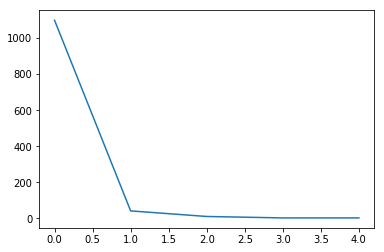

Percentage of gain: 0.017130572417846927
Total gain: 19.85433343228459
000000000000000000000000000000000000000000000000
Percentile:  0
[[348 178]
 [383 190]]
0.4895359417652411
Percentile:  1
[[14  4]
 [10 13]]
0.6585365853658537
Percentile:  2
[[3 0]
 [2 5]]
0.8
Percentile:  3
[[0 0]
 [1 1]]
0.5
Percentile:  4
[[0 0]
 [2 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... AMZN
7.30254087059288
0.0006159569815638473
Diff in tren train and test
0.5247951703320397
0.548748921484038
F1,score 0.4578997161778619
G-score: 0.5056082830025884
Window: 4
[[344 179]
 [394 242]]
Vol pos 0.4073205671977773
Vol neg 0.3015614505840686


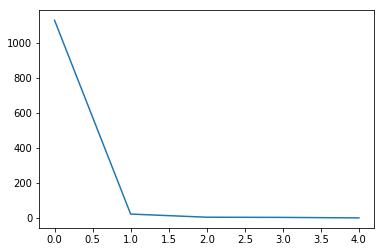

Percentage of gain: 0.05685516927802091
Total gain: 65.89514119322624
000000000000000000000000000000000000000000000000
Percentile:  0
[[329 176]
 [389 234]]
0.499113475177305
Percentile:  1
[[14  2]
 [ 4  2]]
0.7272727272727273
Percentile:  2
[[1 1]
 [0 2]]
0.75
Percentile:  3
[[3]]
1.0
Percentile:  4
000000000000000000000000000000000000000000000000
Working on... PEP
2.357677710534418
0.0
Diff in tren train and test
0.4731420161883738
0.5846833578792342
F1,score 0.7163265306122449
G-score: 0.5905743740795287
Window: 4
[[ 50 232]
 [ 46 351]]
Vol pos 0.28791522535859587
Vol neg 0.26364009319862625


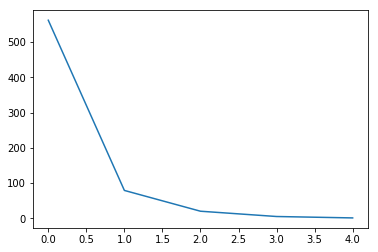

Percentage of gain: 0.06209434382854027
Total gain: 42.16205945957884
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 45 203]
 [ 35 279]]
0.5765124555160143
Percentile:  1
[[ 5 21]
 [ 6 47]]
0.6582278481012658
Percentile:  2
[[ 0  4]
 [ 4 12]]
0.6
Percentile:  3
[[0 3]
 [0 2]]
0.4
Percentile:  4
[[0 1]
 [0 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... GOOGL
3.2472118959107856
0.0
Diff in tren train and test
0.5204829667960328
0.5220017256255393
F1,score 0.3900862068965517
G-score: 0.5116479723899914
Window: 4
[[412 142]
 [424 181]]
Vol pos 0.413636126307079
Vol neg 0.36264424711195603


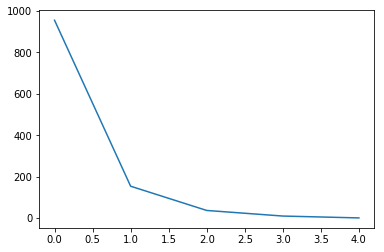

Percentage of gain: 0.03453803195403861
Total gain: 40.029579034730745
000000000000000000000000000000000000000000000000
Percentile:  0
[[335 128]
 [351 141]]
0.49842931937172774
Percentile:  1
[[61 14]
 [52 27]]
0.5714285714285714
Percentile:  2
[[ 9  0]
 [17 11]]
0.5405405405405406
Percentile:  3
[[5 0]
 [3 2]]
0.7
Percentile:  4
[[1]]
1.0
000000000000000000000000000000000000000000000000
Working on... MSFT
2.9815573770491772
0.0
Diff in tren train and test
0.5272688079327441
0.5358067299396031
F1,score 0.5467248908296943
G-score: 0.5522001725625539
Window: 4
[[327 211]
 [308 313]]
Vol pos 0.38616103744489766
Vol neg 0.3381802222037724


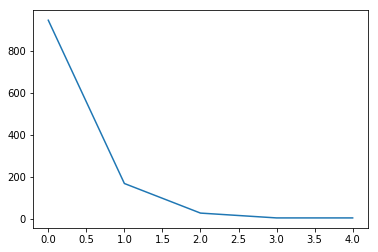

Percentage of gain: 0.06180114636840087
Total gain: 71.6275286409766
000000000000000000000000000000000000000000000000
Percentile:  0
[[265 176]
 [267 239]]
0.53220696937698
Percentile:  1
[[54 23]
 [32 60]]
0.6745562130177515
Percentile:  2
[[ 7  5]
 [ 5 11]]
0.6428571428571429
Percentile:  3
[[1 3]
 [0 1]]
0.4
Percentile:  4
[[0 3]
 [1 1]]
0.2
000000000000000000000000000000000000000000000000
Working on... FB
8.273442632816934
0.0
Diff in tren train and test
0.5162750592800173
0.5358067299396031
F1,score 0.4726947179946284
G-score: 0.4918032786885246
Window: 4
[[306 232]
 [357 264]]
Vol pos 0.4276162262110917
Vol neg 0.4143328411270293


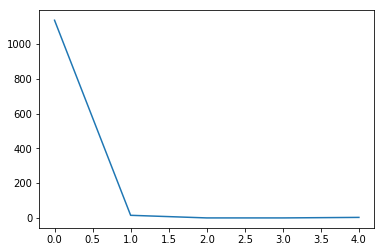

Percentage of gain: -0.00025952932139601466
Total gain: -0.300794483497981
000000000000000000000000000000000000000000000000
Percentile:  0
[[303 228]
 [350 255]]
0.49119718309859156
Percentile:  1
[[3 4]
 [5 3]]
0.4
Percentile:  2
Percentile:  3
Percentile:  4
[[3]]
1.0
000000000000000000000000000000000000000000000000
Working on... INTC
4.729266745218887
0.0
Diff in tren train and test
0.5315800819142057
0.5220017256255393
F1,score 0.5213815789473686
G-score: 0.49784296807592754
Window: 4
[[260 294]
 [288 317]]
Vol pos 0.5014148038068046
Vol neg 0.507872852828103


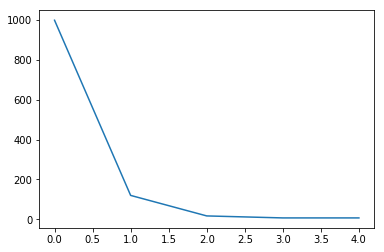

Percentage of gain: -0.005406090206583004
Total gain: -6.265658549429702
000000000000000000000000000000000000000000000000
Percentile:  0
[[219 254]
 [240 286]]
0.5055055055055055
Percentile:  1
[[29 34]
 [36 21]]
0.4166666666666667
Percentile:  2
[[5 3]
 [5 4]]
0.5294117647058824
Percentile:  3
[[4 2]
 [1 0]]
0.5714285714285714
Percentile:  4
[[2 1]
 [1 3]]
0.7142857142857143
000000000000000000000000000000000000000000000000
Working on... CSCO
4.705102717031152
0.0
Diff in tren train and test
0.5418283742992669
0.5314926660914582
F1,score 0.4313011828935396
G-score: 0.46074201898188094
Window: 4
[[297 246]
 [379 237]]
Vol pos 0.37744371068501564
Vol neg 0.38900350739136946


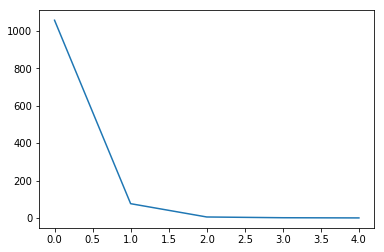

Percentage of gain: -0.03586906869180981
Total gain: -41.57225061380757
000000000000000000000000000000000000000000000000
Percentile:  0
[[275 223]
 [340 218]]
0.4668560606060606
Percentile:  1
[[20 18]
 [24 15]]
0.45454545454545453
Percentile:  2
[[1 2]
 [2 1]]
0.3333333333333333
Percentile:  3
[[0 2]
 [0 0]]
0.0
Percentile:  4
[[1]]
1.0
000000000000000000000000000000000000000000000000
Working on... CMCSA
4.475308641975317
0.0
Diff in tren train and test
0.49784389823199654
0.5090595340811044
F1,score 0.4375644994840041
G-score: 0.5297670405522001
Window: 4
[[402 167]
 [378 212]]
Vol pos 0.4954769405412787
Vol neg 0.5060797456375732


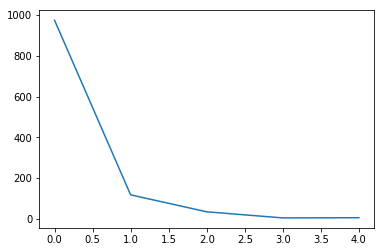

Percentage of gain: 0.024511975944665886
Total gain: 28.409380119867762
000000000000000000000000000000000000000000000000
Percentile:  0
[[337 148]
 [312 177]]
0.5277207392197125
Percentile:  1
[[48 12]
 [35 23]]
0.6016949152542372
Percentile:  2
[[15  6]
 [11  3]]
0.5142857142857142
Percentile:  3
[[1 1]
 [2 1]]
0.4
Percentile:  4
[[1 0]
 [4 1]]
0.3333333333333333
000000000000000000000000000000000000000000000000
Working on... NVDA
3.9791051555757524
0.0
Diff in tren train and test
0.5205863332614787
0.545297670405522
F1,score 0.3894967177242888
G-score: 0.5185504745470233
Window: 4
[[423 104]
 [454 178]]
Vol pos 0.5414066329368792
Vol neg 0.49658235249856986


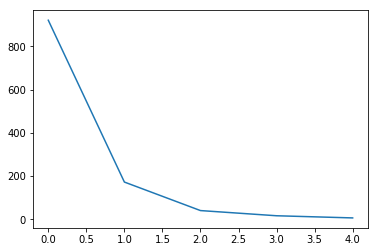

Percentage of gain: 0.04166732847356552
Total gain: 48.29243370086243
000000000000000000000000000000000000000000000000
Percentile:  0
[[348  77]
 [373 123]]
0.511400651465798
Percentile:  1
[[55 16]
 [61 40]]
0.5523255813953488
Percentile:  2
[[ 9  9]
 [13  9]]
0.45
Percentile:  3
[[9 2]
 [2 3]]
0.75
Percentile:  4
[[1 0]
 [3 2]]
0.5
000000000000000000000000000000000000000000000000
Working on... NFLX
4.082771472132831
0.00016525711528829872
Diff in tren train and test
0.5163863734368263
0.5418464193270061
F1,score 0.5499999999999999
G-score: 0.5340811044003452
Window: 4
[[289 242]
 [298 330]]
Vol pos 0.5427171510585707
Vol neg 0.5419923775238074


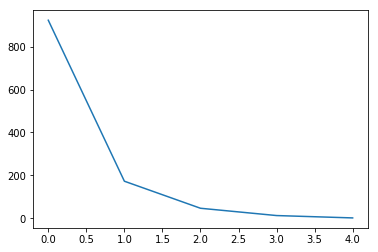

Percentage of gain: 0.037330485455046795
Total gain: 43.26603264239924
000000000000000000000000000000000000000000000000
Percentile:  0
[[234 207]
 [220 261]]
0.5368763557483731
Percentile:  1
[[39 24]
 [58 52]]
0.5260115606936416
Percentile:  2
[[ 9  8]
 [17 13]]
0.46808510638297873
Percentile:  3
[[5 3]
 [3 2]]
0.5384615384615384
Percentile:  4
[[1 0]
 [0 1]]
1.0
000000000000000000000000000000000000000000000000
Working on... BKNG
1.172681553570028
0.000939946799010321
Diff in tren train and test
0.5128939828080229
0.5252293577981652
F1,score 0.5550847457627119
G-score: 0.518348623853211
Window: 4
[[ 95 112]
 [ 98 131]]
Vol pos 0.26323227830118956
Vol neg 0.254623669166016


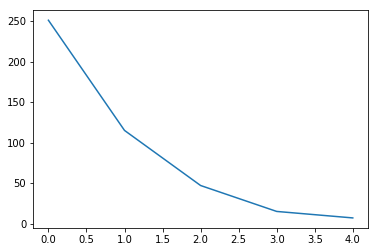

Percentage of gain: 0.013806248557810744
Total gain: 6.019524371205485
000000000000000000000000000000000000000000000000
Percentile:  0
[[50 70]
 [51 80]]
0.5179282868525896
Percentile:  1
[[25 24]
 [33 32]]
0.5
Percentile:  2
[[15 11]
 [ 9 12]]
0.574468085106383
Percentile:  3
[[3 3]
 [2 7]]
0.6666666666666666
Percentile:  4
[[2 2]
 [3 0]]
0.2857142857142857
000000000000000000000000000000000000000000000000
Working on... ADBE
3.3983248022335957
0.0
Diff in tren train and test
0.5432205216641518
0.5470232959447799
F1,score 0.4884868421052631
G-score: 0.4633304572907679
Window: 4
[[240 285]
 [337 297]]
Vol pos 0.4449280871342697
Vol neg 0.41335552827019095


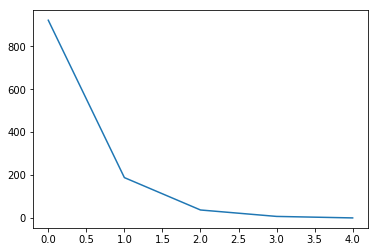

Percentage of gain: -0.015686588259668635
Total gain: -18.18075579295595
000000000000000000000000000000000000000000000000
Percentile:  0
[[190 230]
 [272 230]]
0.455531453362256
Percentile:  1
[[41 44]
 [51 52]]
0.4946808510638298
Percentile:  2
[[ 6  8]
 [11 12]]
0.4864864864864865
Percentile:  3
[[3 2]
 [1 1]]
0.5714285714285714
Percentile:  4
000000000000000000000000000000000000000000000000
Working on... AMGN
3.3162393162393125
0.0
Diff in tren train and test
0.5051746442432082
0.5323554788610871
F1,score 0.5243445692883895
G-score: 0.45211389128559104
Window: 4
[[174 368]
 [267 350]]
Vol pos 0.39066006519433455
Vol neg 0.44515795431732164


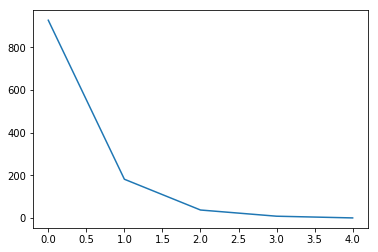

Percentage of gain: -0.0672730171092907
Total gain: -77.96942682966792
000000000000000000000000000000000000000000000000
Percentile:  0
[[147 295]
 [196 288]]
0.46976241900647947
Percentile:  1
[[21 54]
 [60 47]]
0.37362637362637363
Percentile:  2
[[ 5 15]
 [10  8]]
0.34210526315789475
Percentile:  3
[[1 2]
 [1 5]]
0.6666666666666666
Percentile:  4
[[0 1]
 [0 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... TXN
3.62011743681389
0.0
Diff in tren train and test
0.5517464424320828
0.5409836065573771
F1,score 0.47889908256880737
G-score: 0.5099223468507333
Window: 4
[[330 202]
 [366 261]]
Vol pos 0.41743760336806346
Vol neg 0.4167560702649168


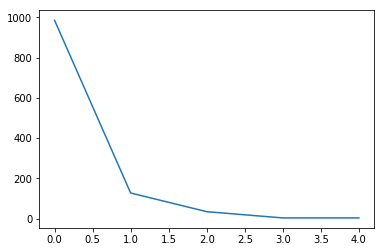

Percentage of gain: 0.00861792552204725
Total gain: 9.988175680052763
000000000000000000000000000000000000000000000000
Percentile:  0
[[288 171]
 [311 216]]
0.5111561866125761
Percentile:  1
[[30 22]
 [43 32]]
0.4881889763779528
Percentile:  2
[[12  9]
 [ 4  9]]
0.6176470588235294
Percentile:  3
[[0 0]
 [2 1]]
0.3333333333333333
Percentile:  4
[[0 0]
 [2 1]]
0.3333333333333333
000000000000000000000000000000000000000000000000
Working on... AVGO
3.5186302609745104
0.0
Diff in tren train and test
0.5191893057352307
0.5289042277825712
F1,score 0.5599369085173502
G-score: 0.5185504745470233
Window: 4
[[246 300]
 [258 355]]
Vol pos 0.4563809319664254
Vol neg 0.4264182056902508


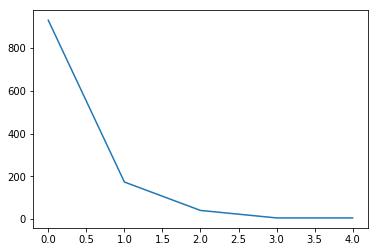

Percentage of gain: 0.03135770607132156
Total gain: 36.343581336661686
000000000000000000000000000000000000000000000000
Percentile:  0
[[201 248]
 [202 279]]
0.5161290322580645
Percentile:  1
[[28 46]
 [41 58]]
0.49710982658959535
Percentile:  2
[[ 9  6]
 [12 13]]
0.55
Percentile:  3
[[2 0]
 [1 2]]
0.8
Percentile:  4
[[5]]
1.0
000000000000000000000000000000000000000000000000
Working on... PYPL
4.9430161675059505
0.0
Diff in tren train and test
0.5337357189049364
0.5306298533218292
F1,score 0.47353224254090476
G-score: 0.5280414150129422
Window: 4
[[366 178]
 [369 246]]
Vol pos 0.5148816059871832
Vol neg 0.49194463533726274


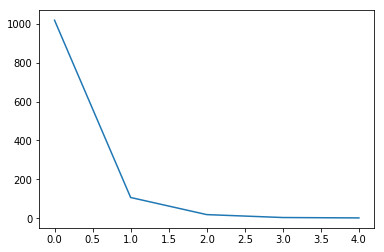

Percentage of gain: 0.039701317803859715
Total gain: 46.01382733467341
000000000000000000000000000000000000000000000000
Percentile:  0
[[331 144]
 [334 209]]
0.5304518664047151
Percentile:  1
[[25 30]
 [28 24]]
0.45794392523364486
Percentile:  2
[[6 4]
 [1 8]]
0.7368421052631579
Percentile:  3
[[1 0]
 [1 2]]
0.75
Percentile:  4
[[2]]
1.0
000000000000000000000000000000000000000000000000
Working on... GILD
7.47230206192292
0.0
Diff in tren train and test
0.5026957084321759
0.5220017256255393
F1,score 0.6
G-score: 0.5030198446937014
Window: 4
[[151 403]
 [173 432]]
Vol pos 0.42360936113271536
Vol neg 0.3949447785719895


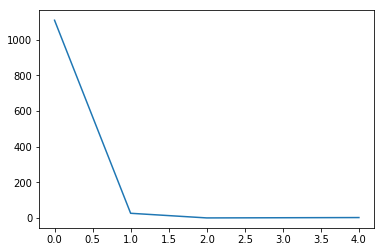

Percentage of gain: 0.016804197655657573
Total gain: 19.476065082907127
000000000000000000000000000000000000000000000000
Percentile:  0
[[148 392]
 [165 404]]
0.4977457168620379
Percentile:  1
[[ 0 10]
 [ 1 15]]
0.5769230769230769
Percentile:  2
Percentile:  3
[[1]]
1.0
Percentile:  4
[[2]]
1.0
000000000000000000000000000000000000000000000000
Working on... COST
2.3891650603631978
0.0
Diff in tren train and test
0.5281310627290364
0.543572044866264
F1,score 0.1923076923076923
G-score: 0.45642795513373596
Window: 4
[[454  75]
 [555  75]]
Vol pos 0.2844327065074457
Vol neg 0.31973276941395334


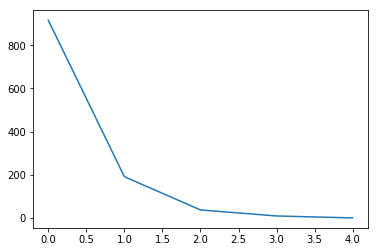

Percentage of gain: -0.04397475667674879
Total gain: -50.966742988351854
000000000000000000000000000000000000000000000000
Percentile:  0
[[372  58]
 [425  61]]
0.47270742358078605
Percentile:  1
[[69 13]
 [96 13]]
0.4293193717277487
Percentile:  2
[[ 9  3]
 [25  0]]
0.24324324324324326
Percentile:  3
[[4 1]
 [4 0]]
0.4444444444444444
Percentile:  4
000000000000000000000000000000000000000000000000
Working on... QCOM
4.165966739459091
0.0
Diff in tren train and test
0.510023712006898
0.5263157894736842
F1,score 0.5004500450045004
G-score: 0.5211389128559103
Window: 4
[[326 223]
 [332 278]]
Vol pos 0.4777645987458605
Vol neg 0.4221512336659791


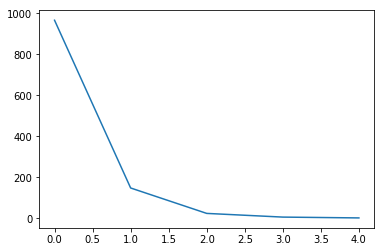

Percentage of gain: 0.04682992489894851
Total gain: 54.27588295788132
000000000000000000000000000000000000000000000000
Percentile:  0
[[280 188]
 [285 213]]
0.510351966873706
Percentile:  1
[[40 33]
 [33 42]]
0.5540540540540541
Percentile:  2
[[ 6  2]
 [ 4 12]]
0.75
Percentile:  3
[[0 0]
 [3 3]]
0.5
Percentile:  4
[[0 0]
 [1 1]]
0.5
000000000000000000000000000000000000000000000000
Mean gain over portfolio :  16.81989578647987


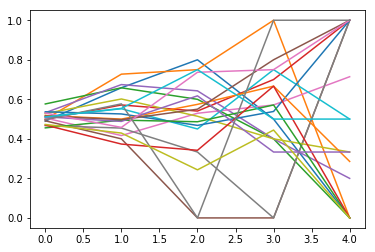

In [3]:
import warnings
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    o+=1
    xtemp=price
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    xtemp=normalize(xtemp,axis=0,norm='max')
    #print(xtemp)
    accintime=[]
    trendwindowtime=[4]
    f1total=[]
    acctotal=[]
    auctotal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        

        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        yvolatility=[]
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            
            if(s==-1):
                
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            x.append(xtemp[i])
        y=np.array(y)
        yvolatility=np.array(yvolatility)
        x=np.array(x)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
        cspace=np.logspace(-4,4,10)
        gspace=np.logspace(-4,4,10)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    prediction=rbf_svm.predict(x_val)
                    
                    cvacclist.append(rbf_svm.score(x_val,y_val))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        rbf_svm=svm.SVC(kernel='rbf',C=maxc, gamma=maxg )
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
            else:
                voln.append(yvolatilitytest[j])
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=rbf_svm.score(x_test,y_test)
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rbf_svm.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        

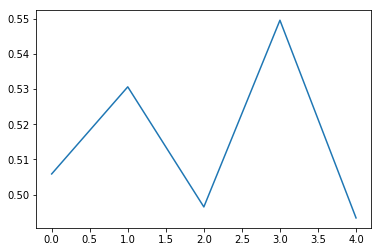

In [ ]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()

Working on... AAPL
6.2151820652697705
0.0025906064609701575
Diff in tren train and test
0.5251082251082251
0.5597920277296361
F1,score 0.5030567685589521
G-score: 0.5069324090121318
Window: 28
[[297 211]
 [358 288]]
Vol pos 1.0920717326979446
Vol neg 0.842598007052401


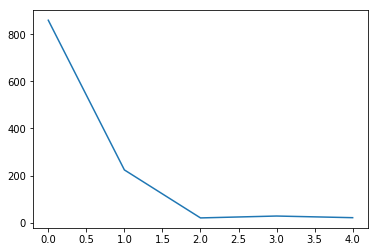

Percentage of gain: 0.1381487847621156
Total gain: 159.4236976154814
000000000000000000000000000000000000000000000000
Percentile:  0
[[244 164]
 [278 173]]
0.48544819557625146
Percentile:  1
[[53 45]
 [56 70]]
0.5491071428571429
Percentile:  2
[[ 0  1]
 [11  8]]
0.4
Percentile:  3
[[ 0  0]
 [13 15]]
0.5357142857142857
Percentile:  4
[[21]]
1.0
000000000000000000000000000000000000000000000000
Working on... AMZN
12.157084770188899
0.000917344130579077
Diff in tren train and test
0.5680883308075341
0.6377816291161178
F1,score 0.5409429280397022
G-score: 0.5190641247833622
Window: 28
[[272 146]
 [409 327]]
Vol pos 1.1368244933794587
Vol neg 0.9188072431263962


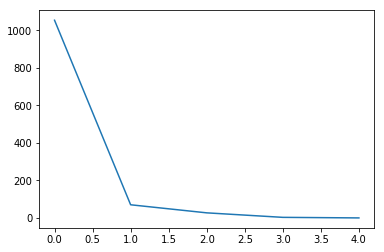

Percentage of gain: 0.14819744505991847
Total gain: 171.0198515991459
000000000000000000000000000000000000000000000000
Percentile:  0
[[243 141]
 [378 290]]
0.5066539923954373
Percentile:  1
[[22  4]
 [22 22]]
0.6285714285714286
Percentile:  2
[[ 6  1]
 [ 7 13]]
0.7037037037037037
Percentile:  3
[[0 0]
 [1 2]]
0.6666666666666666
Percentile:  4
000000000000000000000000000000000000000000000000
Working on... PEP
2.3687214611872096
0.0
Diff in tren train and test
0.44942571322712116
0.7507418397626113
F1,score 0.3557548579970105
G-score: 0.36053412462908013
Window: 28
[[124  44]
 [387 119]]
Vol pos 0.660595001227984
Vol neg 0.7467622831364122


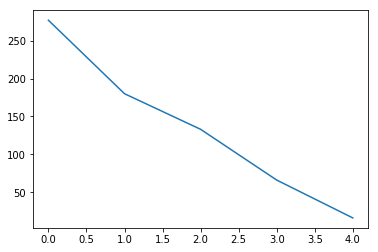

Percentage of gain: -0.23936195657773532
Total gain: -161.3299587333936
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 70  26]
 [127  54]]
0.44765342960288806
Percentile:  1
[[ 24   8]
 [123  25]]
0.2722222222222222
Percentile:  2
[[13  5]
 [93 22]]
0.2631578947368421
Percentile:  3
[[12  2]
 [35 17]]
0.4393939393939394
Percentile:  4
[[5 3]
 [7 1]]
0.375
000000000000000000000000000000000000000000000000
Working on... GOOGL
5.878547598584186
0.00042690345577337966
Diff in tren train and test
0.5540160207837194
0.561525129982669
F1,score 0.5372645372645374
G-score: 0.5103986135181976
Window: 28
[[261 245]
 [320 328]]
Vol pos 1.2742543132066229
Vol neg 1.153518241883093


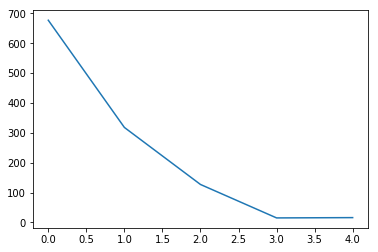

Percentage of gain: 0.08561350417222996
Total gain: 98.79798381475337
000000000000000000000000000000000000000000000000
Percentile:  0
[[167 158]
 [181 170]]
0.4985207100591716
Percentile:  1
[[ 66  66]
 [100  87]]
0.47962382445141066
Percentile:  2
[[13 10]
 [36 67]]
0.6349206349206349
Percentile:  3
[[7 1]
 [3 4]]
0.7333333333333333
Percentile:  4
[[8 8]
 [0 0]]
0.5
000000000000000000000000000000000000000000000000
Working on... MSFT
6.174452793204837
0.0
Diff in tren train and test
0.554978354978355
0.5866551126516465
F1,score 0.5686433793663688
G-score: 0.5398613518197574
Window: 28
[[273 204]
 [327 350]]
Vol pos 0.8841269803877485
Vol neg 0.8012163171160357


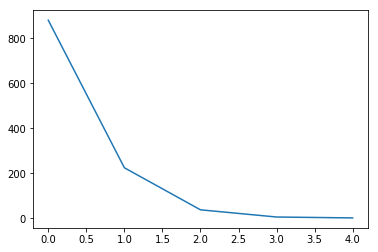

Percentage of gain: 0.10863539375472477
Total gain: 125.36524439295238
000000000000000000000000000000000000000000000000
Percentile:  0
[[220 146]
 [261 254]]
0.5380249716231555
Percentile:  1
[[45 48]
 [65 67]]
0.49777777777777776
Percentile:  2
[[ 7  4]
 [ 1 26]]
0.868421052631579
Percentile:  3
[[1 4]
 [0 1]]
0.3333333333333333
Percentile:  4
[[0 2]
 [0 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... FB
10.887151375939736
0.0
Diff in tren train and test
0.5322510822510822
0.58578856152513
F1,score 0.5479662317728319
G-score: 0.4896013864818024
Window: 28
[[208 270]
 [319 357]]
Vol pos 1.3487958649596934
Vol neg 1.2410617878601204


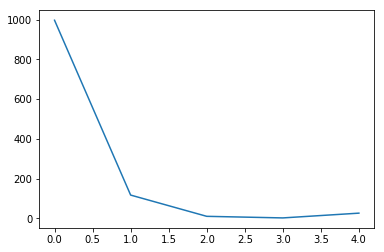

Percentage of gain: 0.026936109750966924
Total gain: 31.084270652615828
000000000000000000000000000000000000000000000000
Percentile:  0
[[199 244]
 [268 286]]
0.4864593781344032
Percentile:  1
[[ 8 17]
 [40 52]]
0.5128205128205128
Percentile:  2
[[1 9]
 [0 0]]
0.1
Percentile:  3
[[0 0]
 [1 1]]
0.5
Percentile:  4
[[ 0  0]
 [ 9 17]]
0.6538461538461539
000000000000000000000000000000000000000000000000
Working on... INTC
8.395303326810174
0.0
Diff in tren train and test
0.5556277056277056
0.5424610051993067
F1,score 0.22781456953642384
G-score: 0.4948006932409012
Window: 28
[[485  43]
 [540  86]]
Vol pos 1.2878375691301227
Vol neg 1.1554217221933412


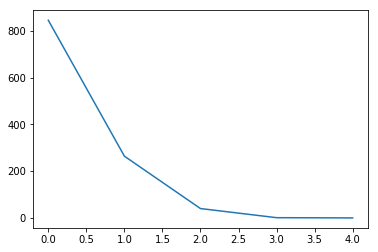

Percentage of gain: 0.05350466892078177
Total gain: 61.744387934582164
000000000000000000000000000000000000000000000000
Percentile:  0
[[356  21]
 [422  46]]
0.4757396449704142
Percentile:  1
[[ 96  20]
 [108  40]]
0.5151515151515151
Percentile:  2
[[32  2]
 [ 6  0]]
0.8
Percentile:  3
[[1]]
1.0
Percentile:  4
000000000000000000000000000000000000000000000000
Working on... CSCO
5.061619718309853
0.0
Diff in tren train and test
0.5869235765317168
0.5233968804159446
F1,score 0.4105378704720088
G-score: 0.5346620450606586
Window: 28
[[430 120]
 [417 187]]
Vol pos 0.9870778029925528
Vol neg 0.8631429192800022


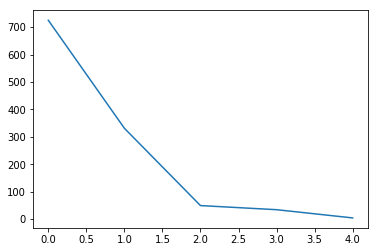

Percentage of gain: 0.12609987590385086
Total gain: 145.5192567930439
000000000000000000000000000000000000000000000000
Percentile:  0
[[246  81]
 [267 131]]
0.52
Percentile:  1
[[138  37]
 [119  37]]
0.5287009063444109
Percentile:  2
[[18  1]
 [19 11]]
0.5918367346938775
Percentile:  3
[[24  0]
 [ 4  6]]
0.8823529411764706
Percentile:  4
[[4]]
1.0
000000000000000000000000000000000000000000000000
Working on... CMCSA
8.98261429491308
0.0
Diff in tren train and test
0.4684996752543841
0.5051993067590987
F1,score 0.6225071225071225
G-score: 0.5407279029462738
Window: 28
[[187 384]
 [146 437]]
Vol pos 1.4836877960966737
Vol neg 1.419142502096801


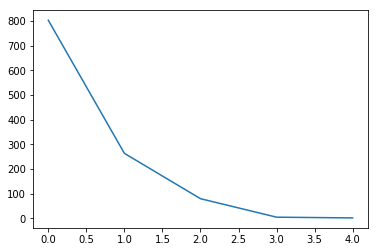

Percentage of gain: 0.15049883765426336
Total gain: 173.67565865301992
000000000000000000000000000000000000000000000000
Percentile:  0
[[136 254]
 [126 287]]
0.526774595267746
Percentile:  1
[[ 33 108]
 [ 15 107]]
0.532319391634981
Percentile:  2
[[18 20]
 [ 3 38]]
0.7088607594936709
Percentile:  3
[[0 2]
 [0 2]]
0.5
Percentile:  4
[[0 0]
 [1 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... NVDA
7.248431726389965
0.007644967700004514
Diff in tren train and test
0.5742424242424242
0.5805892547660312
F1,score 0.1724137931034483
G-score: 0.4592720970537262
Window: 28
[[465  19]
 [605  65]]
Vol pos 1.3634121159690282
Vol neg 1.501504570254596


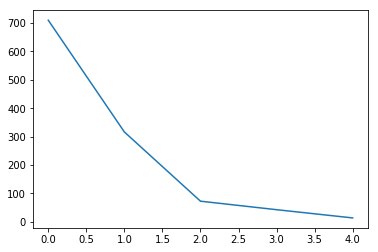

Percentage of gain: -0.1857282758884601
Total gain: -214.33043037528296
000000000000000000000000000000000000000000000000
Percentile:  0
[[309   7]
 [357  38]]
0.4880450070323488
Percentile:  1
[[116   6]
 [184   8]]
0.39490445859872614
Percentile:  2
[[20  2]
 [37 14]]
0.4657534246575342
Percentile:  3
[[19  2]
 [16  4]]
0.5609756097560976
Percentile:  4
[[1 2]
 [9 1]]
0.15384615384615385
000000000000000000000000000000000000000000000000
Working on... NFLX
7.410943467100719
0.001406110187899634
Diff in tren train and test
0.5667893483437974
0.610051993067591
F1,score 0.5209817893903405
G-score: 0.475736568457539
Window: 28
[[220 230]
 [375 329]]
Vol pos 1.6609591912615205
Vol neg 1.5209051722280693


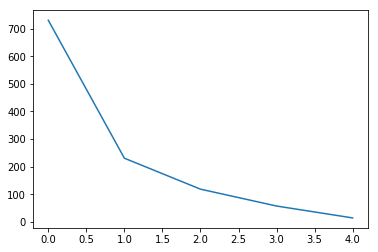

Percentage of gain: -0.007175938644200338
Total gain: -8.28103319540719
000000000000000000000000000000000000000000000000
Percentile:  0
[[172 179]
 [210 168]]
0.4663923182441701
Percentile:  1
[[28 34]
 [91 78]]
0.4588744588744589
Percentile:  2
[[ 8  7]
 [53 51]]
0.4957983193277311
Percentile:  3
[[ 6  5]
 [20 27]]
0.5689655172413793
Percentile:  4
[[6 4]
 [0 5]]
0.7333333333333333
000000000000000000000000000000000000000000000000
Working on... BKNG
1.6778197592411772
0.0027997872161690247
Diff in tren train and test
0.5544611819235226
0.6125290023201856
F1,score 0.3582089552238806
G-score: 0.5011600928074246
Window: 28
[[156  11]
 [204  60]]
Vol pos 0.5275867662121868
Vol neg 0.4765822514273362


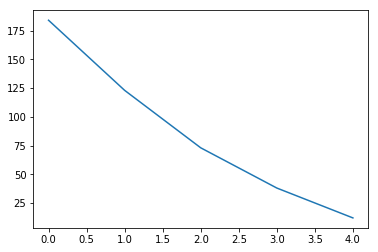

Percentage of gain: 0.02666718664722755
Total gain: 11.493557444955073
000000000000000000000000000000000000000000000000
Percentile:  0
[[62 10]
 [93 19]]
0.44021739130434784
Percentile:  1
[[47  0]
 [52 23]]
0.5737704918032787
Percentile:  2
[[26  1]
 [33 13]]
0.5342465753424658
Percentile:  3
[[11  0]
 [22  5]]
0.42105263157894735
Percentile:  4
[[10  0]
 [ 3  0]]
0.7692307692307693
000000000000000000000000000000000000000000000000
Working on... ADBE
5.959915611814346
0.0
Diff in tren train and test
0.5733766233766234
0.6559792027729636
F1,score 0.5213946117274169
G-score: 0.47660311958405543
Window: 28
[[221 176]
 [428 329]]
Vol pos 1.167776808525871
Vol neg 1.0795831669056084


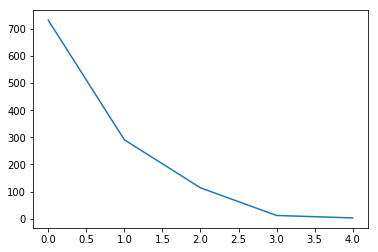

Percentage of gain: -0.008484391786619116
Total gain: -9.79098812175846
000000000000000000000000000000000000000000000000
Percentile:  0
[[135  92]
 [303 202]]
0.4603825136612022
Percentile:  1
[[ 61  52]
 [100  78]]
0.47766323024054985
Percentile:  2
[[21 24]
 [25 44]]
0.5701754385964912
Percentile:  3
[[1 7]
 [0 4]]
0.4166666666666667
Percentile:  4
[[2 1]
 [0 0]]
0.6666666666666666
000000000000000000000000000000000000000000000000
Working on... AMGN
5.291005291005295
0.0
Diff in tren train and test
0.5050876813163022
0.6074523396880416
F1,score 0.6216216216216216
G-score: 0.5147313691507799
Window: 28
[[134 319]
 [241 460]]
Vol pos 1.050254340927799
Vol neg 1.0258041158119129


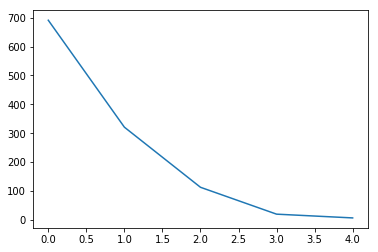

Percentage of gain: 0.04280829606277408
Total gain: 49.40077365644129
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 89 188]
 [163 251]]
0.492040520984081
Percentile:  1
[[ 27  79]
 [ 56 159]]
0.5794392523364486
Percentile:  2
[[12 31]
 [22 48]]
0.5309734513274337
Percentile:  3
[[ 5 14]
 [ 0  1]]
0.3
Percentile:  4
[[1 6]
 [0 0]]
0.14285714285714285
000000000000000000000000000000000000000000000000
Working on... TXN
5.987780040733193
0.0
Diff in tren train and test
0.6269755358302663
0.5883882149046794
F1,score 0.5314581791265729
G-score: 0.451473136915078
Window: 28
[[162 313]
 [320 359]]
Vol pos 0.9874435956956473
Vol neg 0.9213587858619272


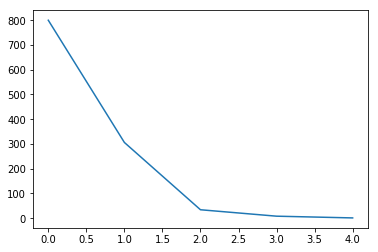

Percentage of gain: -0.05958578690915743
Total gain: -68.76199809316768
000000000000000000000000000000000000000000000000
Percentile:  0
[[126 250]
 [200 224]]
0.4375
Percentile:  1
[[ 36  62]
 [ 99 109]]
0.4738562091503268
Percentile:  2
[[ 0  1]
 [15 18]]
0.5294117647058824
Percentile:  3
[[0 0]
 [2 6]]
0.75
Percentile:  4
[[0 0]
 [1 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... AVGO
5.610368642927625
0.0
Diff in tren train and test
0.48148949989175144
0.6117850953206239
F1,score 0.5791666666666667
G-score: 0.4748700173310225
Window: 28
[[131 317]
 [289 417]]
Vol pos 1.4257714839758413
Vol neg 1.0237549754097288


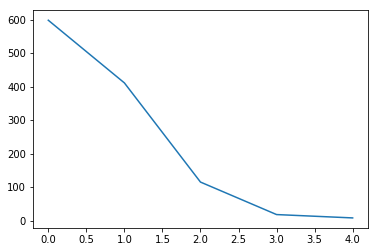

Percentage of gain: 0.13945169681149522
Total gain: 160.92725812046547
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 37 171]
 [178 212]]
0.41638795986622074
Percentile:  1
[[ 61 126]
 [102 122]]
0.44525547445255476
Percentile:  2
[[25 16]
 [ 8 66]]
0.7913043478260869
Percentile:  3
[[6 4]
 [1 7]]
0.7222222222222222
Percentile:  4
[[2 0]
 [0 6]]
1.0
000000000000000000000000000000000000000000000000
Working on... PYPL
6.66413758219524
0.0
Diff in tren train and test
0.5857142857142857
0.6317157712305026
F1,score 0.6411764705882352
G-score: 0.5771230502599654
Window: 28
[[230 195]
 [293 436]]
Vol pos 1.417842824475601
Vol neg 1.250468087252032


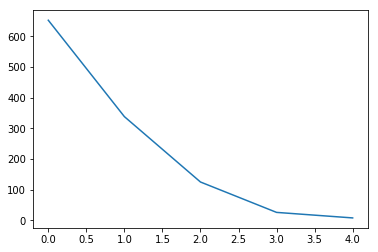

Percentage of gain: 0.2894756451661687
Total gain: 334.0548945217587
000000000000000000000000000000000000000000000000
Percentile:  0
[[136 101]
 [191 224]]
0.5521472392638037
Percentile:  1
[[ 55  49]
 [ 92 142]]
0.5828402366863905
Percentile:  2
[[29 28]
 [ 7 61]]
0.72
Percentile:  3
[[9 9]
 [1 7]]
0.6153846153846154
Percentile:  4
[[1 7]
 [0 0]]
0.125
000000000000000000000000000000000000000000000000
Working on... GILD
7.934752557367997
0.0
Diff in tren train and test
0.4744478129060199
0.5433275563258232
F1,score 0.7025495750708215
G-score: 0.5450606585788561
Window: 28
[[  9 518]
 [  7 620]]
Vol pos 0.9149145603898403
Vol neg 1.2006661727792605


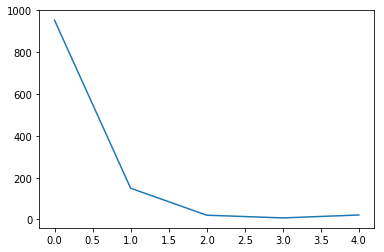

Percentage of gain: -0.04754634508137107
Total gain: -54.86848222390222
000000000000000000000000000000000000000000000000
Percentile:  0
[[  7 427]
 [  7 511]]
0.5441176470588235
Percentile:  1
[[  2  46]
 [  0 101]]
0.6912751677852349
Percentile:  2
[[ 0 16]
 [ 0  4]]
0.2
Percentile:  3
[[0 7]
 [0 0]]
0.0
Percentile:  4
[[ 0 21]
 [ 0  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... COST
2.7652341569841132
0.0027343749999936273
Diff in tren train and test
0.5541125541125541
0.5953206239168111
F1,score 0.02840909090909091
G-score: 0.4072790294627383
Window: 28
[[460   7]
 [677  10]]
Vol pos 0.6365130165742012
Vol neg 0.7717889127635795


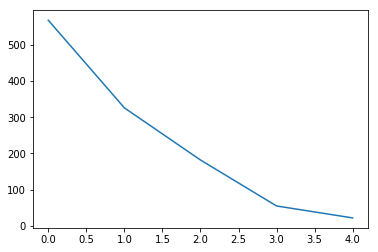

Percentage of gain: -0.19821706979238632
Total gain: -228.74249854041383
000000000000000000000000000000000000000000000000
Percentile:  0
[[254   1]
 [312   3]]
0.45087719298245615
Percentile:  1
[[119   4]
 [199   3]]
0.37538461538461537
Percentile:  2
[[ 72   2]
 [103   4]]
0.4198895027624309
Percentile:  3
[[13  0]
 [41  0]]
0.24074074074074073
Percentile:  4
[[ 2  0]
 [20  0]]
0.09090909090909091
000000000000000000000000000000000000000000000000
Working on... QCOM
6.459999999999993
0.0
Diff in tren train and test
0.5054112554112554
0.5771230502599654
F1,score 0.5660672400312745
G-score: 0.5190641247833622
Window: 28
[[237 251]
 [304 362]]
Vol pos 1.3462525513923354
Vol neg 1.1407629225790206


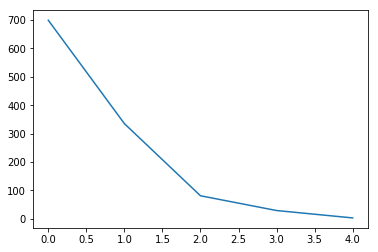

Percentage of gain: 0.15015758774060006
Total gain: 173.28185625265246
000000000000000000000000000000000000000000000000
Percentile:  0
[[166 144]
 [191 198]]
0.5207439198855508
Percentile:  1
[[63 92]
 [92 88]]
0.4507462686567164
Percentile:  2
[[ 8 15]
 [17 41]]
0.6049382716049383
Percentile:  3
[[29]]
1.0
Percentile:  4
[[3]]
1.0
000000000000000000000000000000000000000000000000
Mean gain over portfolio :  47.48416510842709


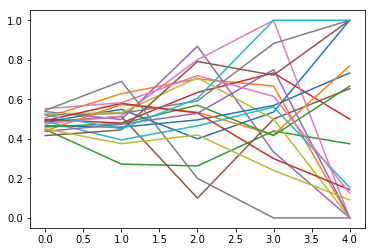

In [12]:
import warnings
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    o+=1
    xtemp=price
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    xtemp=normalize(xtemp,axis=0,norm='max')
    #print(xtemp)
    accintime=[]
    trendwindowtime=[28]
    f1total=[]
    acctotal=[]
    auctotal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        

        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        yvolatility=[]
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            
            if(s==-1):
                
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            x.append(xtemp[i])
        y=np.array(y)
        yvolatility=np.array(yvolatility)
        x=np.array(x)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
        cspace=np.logspace(-4,4,10)
        gspace=np.logspace(-4,4,10)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    prediction=rbf_svm.predict(x_val)
                    
                    cvacclist.append(rbf_svm.score(x_val,y_val))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        rbf_svm=svm.SVC(kernel='rbf',C=maxc, gamma=maxg )
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
            else:
                voln.append(yvolatilitytest[j])
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=rbf_svm.score(x_test,y_test)
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rbf_svm.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        

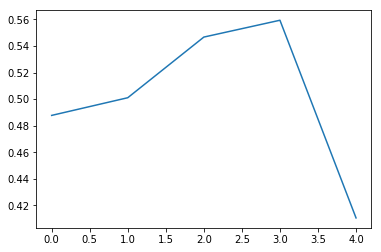

In [13]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()

Working on... AAPL
15.571701720841297
0.005338458253266777
Diff in tren train and test
0.5483443708609271
0.5512367491166078
F1,score 0.5403508771929825
G-score: 0.6528268551236749
Window: 140
[[508   0]
 [393 231]]
Vol pos 4.012098938417768
Vol neg 1.5498911544033689


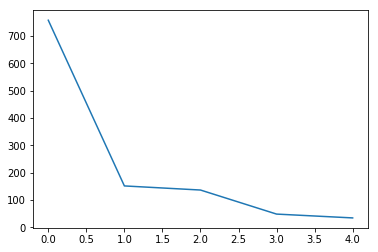

Percentage of gain: 2.0811253461220907
Total gain: 2355.8338918102068
000000000000000000000000000000000000000000000000
Percentile:  0
[[384   0]
 [344  31]]
0.546772068511199
Percentile:  1
[[66  0]
 [41 43]]
0.7266666666666667
Percentile:  2
[[58  0]
 [ 0 79]]
1.0
Percentile:  3
[[ 0  0]
 [ 2 47]]
0.9591836734693877
Percentile:  4
[[ 0  0]
 [ 5 30]]
0.8571428571428571
000000000000000000000000000000000000000000000000
Working on... AMZN
11.150617492631287
0.0007590184265374819
Diff in tren train and test
0.681828218149702
0.7782685512367491
F1,score 0.10425531914893617
G-score: 0.25618374558303886
Window: 140
[[241  10]
 [832  49]]
Vol pos 2.527009178499786
Vol neg 2.3004028064100663


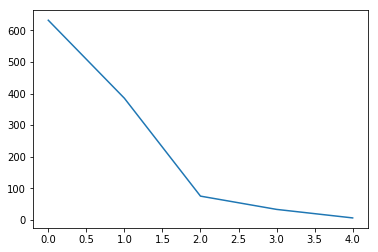

Percentage of gain: -1.063698322643408
Total gain: -1204.106501232338
000000000000000000000000000000000000000000000000
Percentile:  0
[[198   1]
 [426   6]]
0.3232963549920761
Percentile:  1
[[ 29   7]
 [345   4]]
0.08571428571428572
Percentile:  2
[[14  2]
 [54  5]]
0.25333333333333335
Percentile:  3
[[ 0  0]
 [ 6 27]]
0.8181818181818182
Percentile:  4
[[6]]
1.0
000000000000000000000000000000000000000000000000
Working on... PEP
5.495274763738178
0.0
Diff in tren train and test
0.32886163280950553
0.8634969325153374
F1,score 0.0
G-score: 0.13650306748466257
Window: 140
[[ 89   0]
 [563   0]]
Vol pos 0.6185746086617699
Vol neg 2.323669493978796


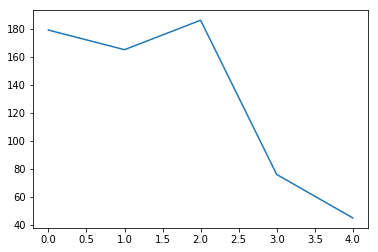

Percentage of gain: -1.9220441486797002
Total gain: -1253.1727849391646
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 70   0]
 [109   0]]
0.39106145251396646
Percentile:  1
[[ 19   0]
 [146   0]]
0.11515151515151516
Percentile:  2
[[  0   0]
 [186   0]]
0.0
Percentile:  3
[[ 0  0]
 [76  0]]
0.0
Percentile:  4
[[ 0  0]
 [45  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... GOOGL
9.280622946926826
0.003477111910863453
Diff in tren train and test
0.6281739898432325
0.598939929328622
F1,score 0.6277173913043478
G-score: 0.5159010600706714
Window: 140
[[122 332]
 [216 462]]
Vol pos 3.2382788734981016
Vol neg 2.634607159187553


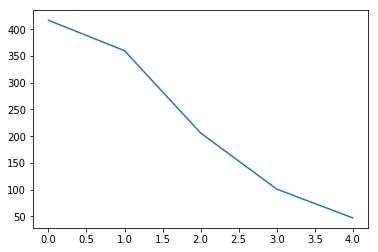

Percentage of gain: 0.39522097074921575
Total gain: 447.39013888811223
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 75 156]
 [ 63 122]]
0.4735576923076923
Percentile:  1
[[ 16  95]
 [ 87 162]]
0.49444444444444446
Percentile:  2
[[30 67]
 [25 84]]
0.5533980582524272
Percentile:  3
[[ 1 13]
 [35 52]]
0.5247524752475248
Percentile:  4
[[ 0  0]
 [ 6 41]]
0.8723404255319149
000000000000000000000000000000000000000000000000
Working on... MSFT
5.843279709392834
0.0
Diff in tren train and test
0.6783664459161148
0.622791519434629
F1,score 0.1504539559014267
G-score: 0.4213780918727915
Window: 140
[[419   8]
 [647  58]]
Vol pos 1.3059768186351863
Vol neg 1.7573418779171495


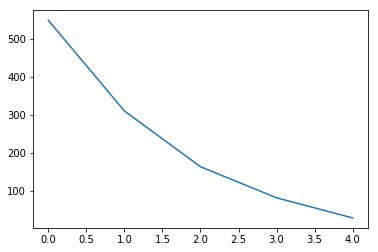

Percentage of gain: -0.4665264907656793
Total gain: -528.107987546749
000000000000000000000000000000000000000000000000
Percentile:  0
[[295   5]
 [236  13]]
0.5610200364298725
Percentile:  1
[[ 71   3]
 [214  22]]
0.3
Percentile:  2
[[ 23   0]
 [127  13]]
0.22085889570552147
Percentile:  3
[[20  0]
 [57  4]]
0.2962962962962963
Percentile:  4
[[10  0]
 [12  6]]
0.5714285714285714
000000000000000000000000000000000000000000000000
Working on... FB
12.871078806426938
0.005182421227207363
Diff in tren train and test
0.5688741721854305
0.7676678445229682
F1,score 0.5268987341772152
G-score: 0.4717314487632509
Window: 140
[[201  62]
 [536 333]]
Vol pos 3.361041269118269
Vol neg 2.82845925841874


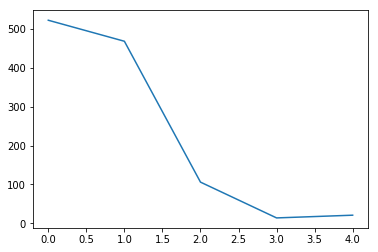

Percentage of gain: 0.09132279255719909
Total gain: 103.37740117474937
000000000000000000000000000000000000000000000000
Percentile:  0
[[197  15]
 [268  42]]
0.4578544061302682
Percentile:  1
[[  3  34]
 [245 186]]
0.40384615384615385
Percentile:  2
[[ 0 13]
 [23 69]]
0.6571428571428571
Percentile:  3
[[14]]
1.0
Percentile:  4
[[21]]
1.0
000000000000000000000000000000000000000000000000
Working on... INTC
6.746031746031759
0.009064539521396952
Diff in tren train and test
0.5922737306843268
0.6033568904593639
F1,score 0.24819277108433738
G-score: 0.44876325088339225
Window: 140
[[405  44]
 [580 103]]
Vol pos 2.650054352814078
Vol neg 2.0772358903216026


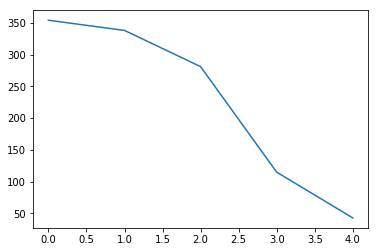

Percentage of gain: 0.0441982470573069
Total gain: 50.03241566887141
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 92  24]
 [208  30]]
0.3446327683615819
Percentile:  1
[[110   4]
 [190  37]]
0.4310850439882698
Percentile:  2
[[113  14]
 [124  27]]
0.5035971223021583
Percentile:  3
[[62  1]
 [48  3]]
0.5701754385964912
Percentile:  4
[[28  1]
 [ 9  5]]
0.7674418604651163
000000000000000000000000000000000000000000000000
Working on... CSCO
6.455652128779988
0.0
Diff in tren train and test
0.6774122322808567
0.5485865724381626
F1,score 0.0
G-score: 0.45141342756183744
Window: 140
[[511   0]
 [621   0]]
Vol pos 2.1637721407796304
Vol neg 1.5810780547463121


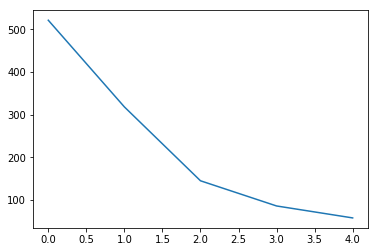

Percentage of gain: 0.1093976077216708
Total gain: 123.83809194093135
000000000000000000000000000000000000000000000000
Percentile:  0
[[231   0]
 [290   0]]
0.44337811900191937
Percentile:  1
[[105   0]
 [213   0]]
0.330188679245283
Percentile:  2
[[64  0]
 [81  0]]
0.4413793103448276
Percentile:  3
[[58  0]
 [28  0]]
0.6744186046511628
Percentile:  4
[[52  0]
 [ 6  0]]
0.896551724137931
000000000000000000000000000000000000000000000000
Working on... CMCSA
10.63829787234043
0.0
Diff in tren train and test
0.4561713402517112
0.5220848056537103
F1,score 0.6624843161856964
G-score: 0.5247349823321554
Window: 140
[[ 66 475]
 [ 63 528]]
Vol pos 2.7841769989996425
Vol neg 2.9404863996160984


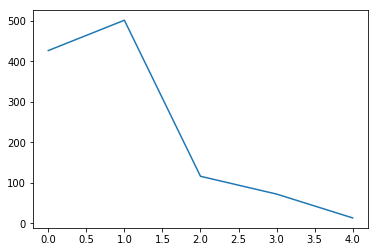

Percentage of gain: 0.06344474771406948
Total gain: 71.81945441232665
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 31 196]
 [ 25 175]]
0.48243559718969553
Percentile:  1
[[ 23 175]
 [ 35 269]]
0.5816733067729084
Percentile:  2
[[ 5 37]
 [ 3 71]]
0.6551724137931034
Percentile:  3
[[ 6 54]
 [ 0 12]]
0.25
Percentile:  4
[[ 1 12]
 [ 0  0]]
0.07692307692307693
000000000000000000000000000000000000000000000000
Working on... NVDA
14.360220994475142
0.0
Diff in tren train and test
0.64878587196468
0.5795053003533569
F1,score 0.4583333333333333
G-score: 0.49469964664310956
Window: 140
[[318 158]
 [414 242]]
Vol pos 4.078627175277712
Vol neg 3.4715275001699197


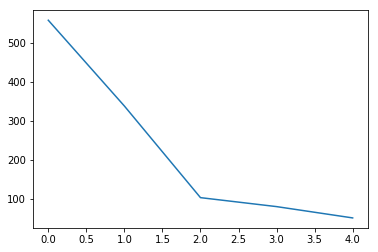

Percentage of gain: 0.2635313498748455
Total gain: 298.3174880583251
000000000000000000000000000000000000000000000000
Percentile:  0
[[211 101]
 [198  48]]
0.46415770609318996
Percentile:  1
[[ 94  24]
 [127  93]]
0.5532544378698225
Percentile:  2
[[ 9 22]
 [53 19]]
0.27184466019417475
Percentile:  3
[[ 4 11]
 [25 40]]
0.55
Percentile:  4
[[ 0  0]
 [10 41]]
0.803921568627451
000000000000000000000000000000000000000000000000
Working on... NFLX
14.669899702413757
0.00276273621394378
Diff in tren train and test
0.6529035107087657
0.7376325088339223
F1,score 0.09698275862068967
G-score: 0.2597173144876325
Window: 140
[[249  48]
 [790  45]]
Vol pos 3.0505733162969366
Vol neg 4.790365200794907


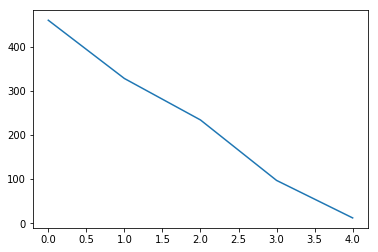

Percentage of gain: -2.7539377060731742
Total gain: -3117.457483274833
000000000000000000000000000000000000000000000000
Percentile:  0
[[140  30]
 [252  38]]
0.3869565217391304
Percentile:  1
[[ 59   1]
 [264   4]]
0.19207317073170732
Percentile:  2
[[ 29   9]
 [193   2]]
0.13304721030042918
Percentile:  3
[[19  8]
 [69  1]]
0.20618556701030927
Percentile:  4
[[ 1  0]
 [11  0]]
0.08333333333333333
000000000000000000000000000000000000000000000000
Working on... BKNG
3.9693863684895057
0.013598169405054938
Diff in tren train and test
0.5880195599022005
0.6748166259168704
F1,score 0.7334851936218679
G-score: 0.7139364303178484
Window: 140
[[131   2]
 [115 161]]
Vol pos 1.2479489644575337
Vol neg 0.7267507941308652


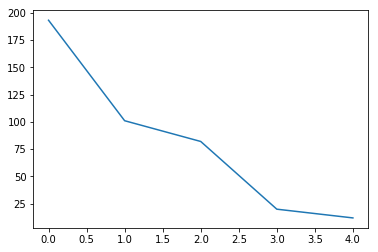

Percentage of gain: 0.6830593024652533
Total gain: 279.3712547082886
000000000000000000000000000000000000000000000000
Percentile:  0
[[97  2]
 [74 23]]
0.6122448979591837
Percentile:  1
[[26  0]
 [26 46]]
0.7346938775510204
Percentile:  2
[[ 7  0]
 [14 61]]
0.8292682926829268
Percentile:  3
[[ 0  0]
 [ 1 18]]
0.9473684210526315
Percentile:  4
[[12]]
1.0
000000000000000000000000000000000000000000000000
Working on... ADBE
9.949148290880911
0.0
Diff in tren train and test
0.714569536423841
0.6528268551236749
F1,score 0.0
G-score: 0.3471731448763251
Window: 140
[[393   0]
 [739   0]]
Vol pos 1.9228057515451291
Vol neg 3.019296406693237


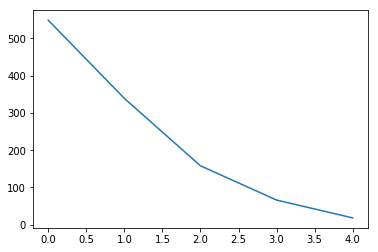

Percentage of gain: -1.3035312581175498
Total gain: -1475.5973841890664
000000000000000000000000000000000000000000000000
Percentile:  0
[[267   0]
 [282   0]]
0.48633879781420764
Percentile:  1
[[ 78   0]
 [261   0]]
0.23008849557522124
Percentile:  2
[[ 25   0]
 [133   0]]
0.15822784810126583
Percentile:  3
[[23  0]
 [43  0]]
0.3484848484848485
Percentile:  4
[[ 0  0]
 [18  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... AMGN
6.235840507476206
0.0
Diff in tren train and test
0.5365422830646942
0.7190812720848057
F1,score 0.6987060998151571
G-score: 0.5680212014134276
Window: 140
[[ 76 242]
 [247 567]]
Vol pos 1.9408904050396665
Vol neg 1.8408600995846578


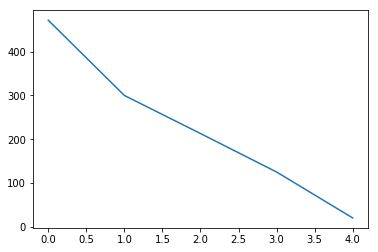

Percentage of gain: 0.30725436549788687
Total gain: 347.8119417436079
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 74  89]
 [153 156]]
0.4872881355932203
Percentile:  1
[[  2  53]
 [ 54 191]]
0.6433333333333333
Percentile:  2
[[  0  26]
 [ 34 153]]
0.7183098591549296
Percentile:  3
[[ 0 56]
 [ 6 63]]
0.504
Percentile:  4
[[ 0 17]
 [ 0  3]]
0.15
000000000000000000000000000000000000000000000000
Working on... TXN
8.254787181267975
0.008754267705498472
Diff in tren train and test
0.6904393905939501
0.6740282685512368
F1,score 0.5274336283185841
G-score: 0.5282685512367491
Window: 140
[[300  69]
 [465 298]]
Vol pos 2.4192553564486765
Vol neg 2.5800931469437076


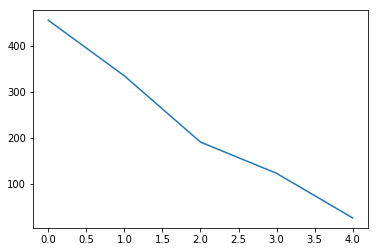

Percentage of gain: 0.060905444070997204
Total gain: 68.94496268836883
000000000000000000000000000000000000000000000000
Percentile:  0
[[169  39]
 [176  71]]
0.5274725274725275
Percentile:  1
[[106  24]
 [105 100]]
0.6149253731343284
Percentile:  2
[[ 12   2]
 [113  65]]
0.4010416666666667
Percentile:  3
[[ 7  3]
 [63 49]]
0.45901639344262296
Percentile:  4
[[ 6  1]
 [ 6 13]]
0.7307692307692307
000000000000000000000000000000000000000000000000
Working on... AVGO
10.183057294555825
0.0
Diff in tren train and test
0.502539191874586
0.6369257950530035
F1,score 0.6795270690728065
G-score: 0.5450530035335689
Window: 140
[[ 71 340]
 [175 546]]
Vol pos 3.5694595428965057
Vol neg 2.6340575927805667


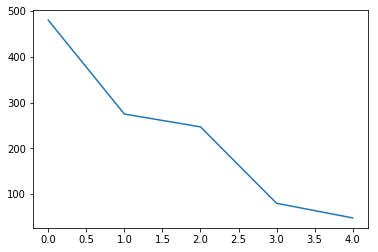

Percentage of gain: 0.7471880544921838
Total gain: 845.8168776851521
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 49 157]
 [132 142]]
0.39791666666666664
Percentile:  1
[[ 22 103]
 [ 21 129]]
0.5490909090909091
Percentile:  2
[[  0  25]
 [ 22 200]]
0.8097165991902834
Percentile:  3
[[ 0 17]
 [ 0 63]]
0.7875
Percentile:  4
[[ 0 37]
 [ 0 11]]
0.22916666666666666
000000000000000000000000000000000000000000000000
Working on... PYPL
12.136266855926186
0.0
Diff in tren train and test
0.704635761589404
0.7164310954063604
F1,score 0.3158896289248335
G-score: 0.36484098939929327
Window: 140
[[247  74]
 [645 166]]
Vol pos 3.2347494782033386
Vol neg 2.7093265106306683


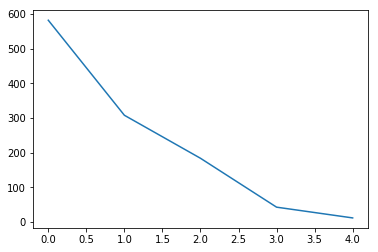

Percentage of gain: -0.5406839457998865
Total gain: -612.0542266454715
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 97  40]
 [362  83]]
0.30927835051546393
Percentile:  1
[[ 40  11]
 [198  59]]
0.32142857142857145
Percentile:  2
[[99 21]
 [49 15]]
0.6195652173913043
Percentile:  3
[[11  2]
 [26  4]]
0.3488372093023256
Percentile:  4
[[0 0]
 [9 3]]
0.25
000000000000000000000000000000000000000000000000
Working on... GILD
12.867944909532813
0.0
Diff in tren train and test
0.47747349823321555
0.49469964664310956
F1,score 0.6619385342789599
G-score: 0.49469964664310956
Window: 140
[[  0 572]
 [  0 560]]
Vol pos 2.6532730213847575
Vol neg 3.7781121444006076


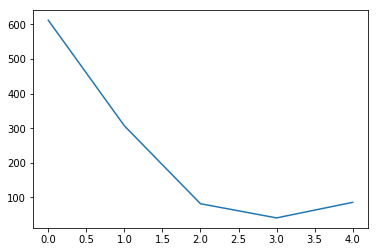

Percentage of gain: -0.5965081754608511
Total gain: -675.2472546216834
000000000000000000000000000000000000000000000000
Percentile:  0
[[  0 329]
 [  0 283]]
0.4624183006535948
Percentile:  1
[[  0 103]
 [  0 204]]
0.6644951140065146
Percentile:  2
[[ 0 12]
 [ 0 70]]
0.8536585365853658
Percentile:  3
[[ 0 41]
 [ 0  0]]
0.0
Percentile:  4
[[ 0 86]
 [ 0  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... COST
4.088465050218121
0.001175434642521966
Diff in tren train and test
0.6527593818984547
0.676678445229682
F1,score 0.0
G-score: 0.32332155477031804
Window: 140
[[366   0]
 [766   0]]
Vol pos 0.9726364532873756
Vol neg 1.638555108479072


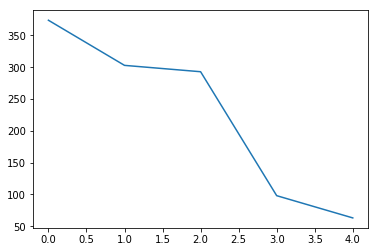

Percentage of gain: -0.7943005929256092
Total gain: -899.1482711917896
000000000000000000000000000000000000000000000000
Percentile:  0
[[188   0]
 [185   0]]
0.5040214477211796
Percentile:  1
[[ 97   0]
 [206   0]]
0.3201320132013201
Percentile:  2
[[ 68   0]
 [225   0]]
0.23208191126279865
Percentile:  3
[[12  0]
 [86  0]]
0.12244897959183673
Percentile:  4
[[ 0  0]
 [63  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... QCOM
11.725006748852696
0.0
Diff in tren train and test
0.47770419426048566
0.6855123674911661
F1,score 0.7847180109157065
G-score: 0.6863957597173145
Window: 140
[[130 226]
 [129 647]]
Vol pos 3.310221661336748
Vol neg 3.4000526445317614


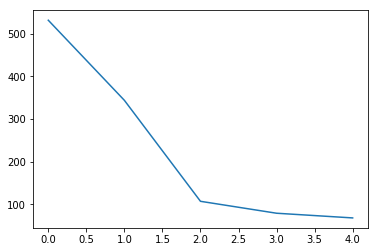

Percentage of gain: 1.2058511855564291
Total gain: 1365.0235420498777
000000000000000000000000000000000000000000000000
Percentile:  0
[[107 126]
 [ 74 225]]
0.6240601503759399
Percentile:  1
[[ 22  26]
 [ 50 246]]
0.7790697674418605
Percentile:  2
[[ 0 17]
 [ 5 85]]
0.794392523364486
Percentile:  3
[[ 1 10]
 [ 0 68]]
0.8734177215189873
Percentile:  4
[[ 0 46]
 [ 0 22]]
0.3235294117647059
000000000000000000000000000000000000000000000000
Mean gain over portfolio :  -170.36572164061386


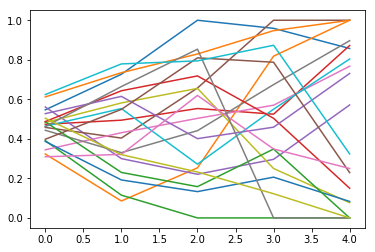

In [14]:
import warnings
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    o+=1
    xtemp=price
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    xtemp=normalize(xtemp,axis=0,norm='max')
    #print(xtemp)
    accintime=[]
    trendwindowtime=[140]
    f1total=[]
    acctotal=[]
    auctotal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        

        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        yvolatility=[]
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            
            if(s==-1):
                
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            x.append(xtemp[i])
        y=np.array(y)
        yvolatility=np.array(yvolatility)
        x=np.array(x)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
        cspace=np.logspace(-4,4,10)
        gspace=np.logspace(-4,4,10)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    prediction=rbf_svm.predict(x_val)
                    
                    cvacclist.append(rbf_svm.score(x_val,y_val))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        rbf_svm=svm.SVC(kernel='rbf',C=maxc, gamma=maxg )
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
            else:
                voln.append(yvolatilitytest[j])
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=rbf_svm.score(x_test,y_test)
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rbf_svm.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        

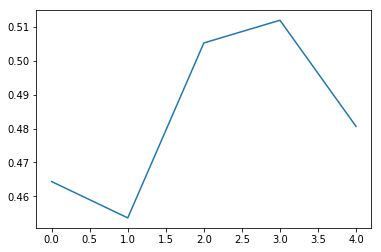

In [15]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()

Working on... AAPL
15.270476249727803
0.0052039966694373985
Diff in tren train and test
0.5548862115127176
0.6080357142857142
F1,score 0.514161220043573
G-score: 0.6017857142857143
Window: 200
[[438   1]
 [445 236]]
Vol pos 5.6593983250167375
Vol neg 1.9746306437088992


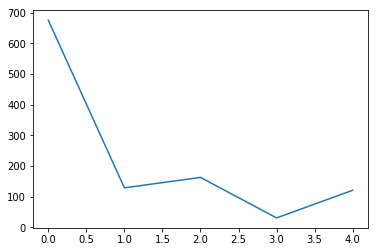

Percentage of gain: 2.6194189321134926
Total gain: 2933.749203967112
000000000000000000000000000000000000000000000000
Percentile:  0
[[279   1]
 [380  14]]
0.43471810089020774
Percentile:  1
[[74  0]
 [43 12]]
0.6666666666666666
Percentile:  2
[[77  0]
 [21 65]]
0.8711656441717791
Percentile:  3
[[ 8  0]
 [ 0 23]]
1.0
Percentile:  4
[[121]]
1.0
000000000000000000000000000000000000000000000000
Working on... AMZN
11.321930760535398
0.0025179720253285087
Diff in tren train and test
0.7125641597857622
0.8303571428571429
F1,score 0.15597235932872658
G-score: 0.23660714285714285
Window: 200
[[186   4]
 [851  79]]
Vol pos 1.9642232822112264
Vol neg 3.165416067597685


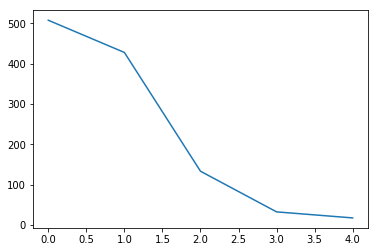

Percentage of gain: -1.9517067571518263
Total gain: -2185.9115680100454
000000000000000000000000000000000000000000000000
Percentile:  0
[[184   4]
 [284  36]]
0.4330708661417323
Percentile:  1
[[  2   0]
 [404  22]]
0.056074766355140186
Percentile:  2
[[  0   0]
 [133   0]]
0.0
Percentile:  3
[[ 0  0]
 [28  4]]
0.125
Percentile:  4
[[ 0  0]
 [ 1 16]]
0.9411764705882353
000000000000000000000000000000000000000000000000
Working on... PEP
7.1599283011352295
0.0
Diff in tren train and test
0.31081608746583367
0.9765625
F1,score 0.0
G-score: 0.0234375
Window: 200
[[ 15   0]
 [625   0]]
Vol pos 0.20804619519448753
Vol neg 2.781266018527118


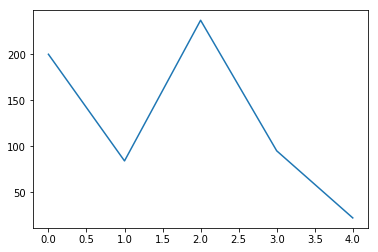

Percentage of gain: -2.7112040135180178
Total gain: -1735.1705686515313
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 15   0]
 [185   0]]
0.075
Percentile:  1
[[ 0  0]
 [84  0]]
0.0
Percentile:  2
[[  0   0]
 [237   0]]
0.0
Percentile:  3
[[ 0  0]
 [95  0]]
0.0
Percentile:  4
[[ 0  0]
 [22  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... GOOGL
9.972699216586207
0.0019559137050855525
Diff in tren train and test
0.6355724168712341
0.6625
F1,score 0.6801566579634465
G-score: 0.5625
Window: 200
[[109 269]
 [221 521]]
Vol pos 3.91221970327551
Vol neg 2.8239646360839323


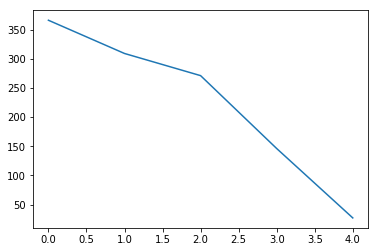

Percentage of gain: 0.965139054805754
Total gain: 1080.9557413824446
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 39 139]
 [ 73 114]]
0.4191780821917808
Percentile:  1
[[ 35  63]
 [ 55 156]]
0.6181229773462783
Percentile:  2
[[ 25  67]
 [ 78 101]]
0.46494464944649444
Percentile:  3
[[ 10   0]
 [ 15 121]]
0.8972602739726028
Percentile:  4
[[27]]
1.0
000000000000000000000000000000000000000000000000
Working on... MSFT
5.8924023311029625
0.0
Diff in tren train and test
0.6749219098616689
0.6848214285714286
F1,score 0.24778761061946902
G-score: 0.39285714285714285
Window: 200
[[328  25]
 [655 112]]
Vol pos 1.4456365392785693
Vol neg 2.042289369043819


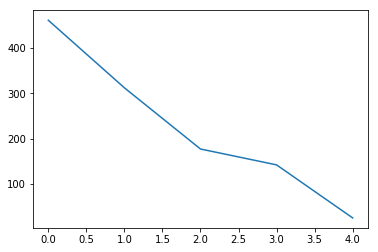

Percentage of gain: -0.6720327622028807
Total gain: -752.6766936672263
000000000000000000000000000000000000000000000000
Percentile:  0
[[189  16]
 [221  35]]
0.48590021691973967
Percentile:  1
[[117   7]
 [172  16]]
0.42628205128205127
Percentile:  2
[[ 21   2]
 [129  25]]
0.2598870056497175
Percentile:  3
[[  1   0]
 [109  32]]
0.2323943661971831
Percentile:  4
[[ 0  0]
 [21  4]]
0.16
000000000000000000000000000000000000000000000000
Working on... FB
12.336073288573756
0.010328444536258126
Diff in tren train and test
0.5437304774654173
0.8705357142857143
F1,score 0.542713567839196
G-score: 0.43125
Window: 200
[[105  40]
 [597 378]]
Vol pos 4.395656897384647
Vol neg 2.90241476560479


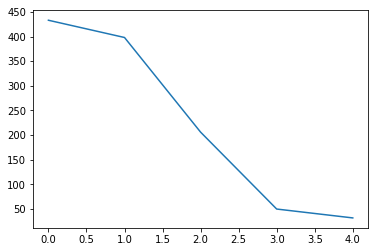

Percentage of gain: 0.24487863905940493
Total gain: 274.26407574653354
000000000000000000000000000000000000000000000000
Percentile:  0
[[105   4]
 [279  46]]
0.347926267281106
Percentile:  1
[[  0  35]
 [223 139]]
0.3501259445843829
Percentile:  2
[[  0   1]
 [ 93 112]]
0.5436893203883495
Percentile:  3
[[ 0  0]
 [ 1 48]]
0.9795918367346939
Percentile:  4
[[32]]
1.0
000000000000000000000000000000000000000000000000
Working on... INTC
7.207444473707307
0.0
Diff in tren train and test
0.6316376617581437
0.5767857142857142
F1,score 0.39800995024875624
G-score: 0.45982142857142855
Window: 200
[[315 159]
 [446 200]]
Vol pos 2.3836100609901596
Vol neg 2.4880330284720076


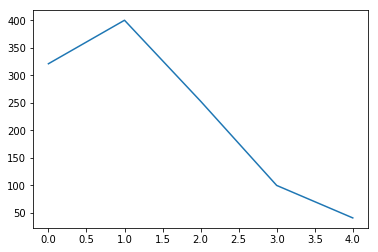

Percentage of gain: -0.24794714358538608
Total gain: -277.7008008156324
000000000000000000000000000000000000000000000000
Percentile:  0
[[125  45]
 [117  34]]
0.4953271028037383
Percentile:  1
[[115  55]
 [162  68]]
0.4575
Percentile:  2
[[ 51  34]
 [108  60]]
0.43873517786561267
Percentile:  3
[[ 9 14]
 [49 28]]
0.37
Percentile:  4
[[14 11]
 [ 7  9]]
0.5609756097560976
000000000000000000000000000000000000000000000000
Working on... CSCO
6.408313487767918
0.011134617525877858
Diff in tren train and test
0.7139031466190583
0.5776785714285714
F1,score 0.0710059171597633
G-score: 0.4392857142857143
Window: 200
[[468   5]
 [623  24]]
Vol pos 2.516603672765409
Vol neg 1.8528750116561432


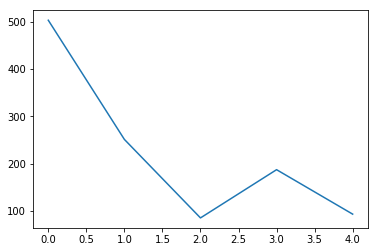

Percentage of gain: 0.06657455328618157
Total gain: 74.56349968052336
000000000000000000000000000000000000000000000000
Percentile:  0
[[227   3]
 [266  10]]
0.4683794466403162
Percentile:  1
[[ 37   2]
 [200   8]]
0.18218623481781376
Percentile:  2
[[13  0]
 [74  1]]
0.1590909090909091
Percentile:  3
[[114   0]
 [ 68   5]]
0.6363636363636364
Percentile:  4
[[76  0]
 [14  0]]
0.8444444444444444
000000000000000000000000000000000000000000000000
Working on... CMCSA
10.116774878445044
0.0
Diff in tren train and test
0.4478910957375586
0.5348214285714286
F1,score 0.6434316353887399
G-score: 0.525
Window: 200
[[108 413]
 [119 480]]
Vol pos 3.44929923094716
Vol neg 3.2904636317751534


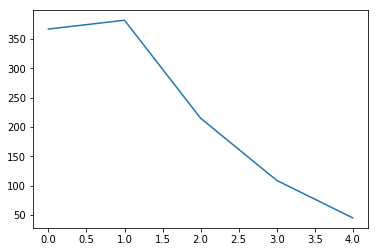

Percentage of gain: 0.24791187115406116
Total gain: 277.6612956925485
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 34 104]
 [ 71 158]]
0.5231607629427792
Percentile:  1
[[ 30 133]
 [ 45 174]]
0.5340314136125655
Percentile:  2
[[ 22 113]
 [  2  78]]
0.46511627906976744
Percentile:  3
[[11 55]
 [ 0 43]]
0.4954128440366973
Percentile:  4
[[11  8]
 [ 0 26]]
0.8222222222222222
000000000000000000000000000000000000000000000000
Working on... NVDA
16.150883867675034
0.0019193489568320964
Diff in tren train and test
0.6510486390004462
0.6419642857142858
F1,score 0.430493273542601
G-score: 0.4330357142857143
Window: 200
[[245 156]
 [479 240]]
Vol pos 5.738043292203486
Vol neg 3.8572564923710635


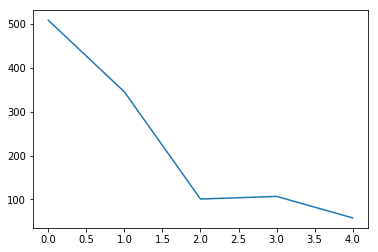

Percentage of gain: 0.29785100362773687
Total gain: 333.59312406306526
000000000000000000000000000000000000000000000000
Percentile:  0
[[143  71]
 [249  44]]
0.368836291913215
Percentile:  1
[[ 92  77]
 [133  43]]
0.391304347826087
Percentile:  2
[[10  8]
 [58 25]]
0.3465346534653465
Percentile:  3
[[ 0  0]
 [25 82]]
0.7663551401869159
Percentile:  4
[[ 0  0]
 [13 45]]
0.7758620689655172
000000000000000000000000000000000000000000000000
Working on... NFLX
16.219868718627612
0.0
Diff in tren train and test
0.625083686677081
0.7964285714285714
F1,score 0.13886010362694298
G-score: 0.2580357142857143
Window: 200
[[222   6]
 [825  67]]
Vol pos 4.057343213022746
Vol neg 5.808264702685084


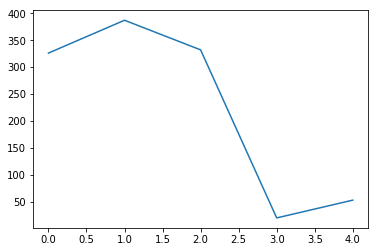

Percentage of gain: -3.2625855172926173
Total gain: -3654.095779367731
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 87   1]
 [223  15]]
0.3128834355828221
Percentile:  1
[[ 94   4]
 [250  39]]
0.34366925064599485
Percentile:  2
[[ 41   1]
 [277  13]]
0.16265060240963855
Percentile:  3
[[ 0  0]
 [20  0]]
0.0
Percentile:  4
[[ 0  0]
 [53  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... BKNG
4.336126439130737
0.0018669255470074874
Diff in tren train and test
0.5384130982367759
0.690176322418136
F1,score 0.8297872340425533
G-score: 0.7984886649874056
Window: 200
[[122   1]
 [ 79 195]]
Vol pos 1.525160125423214
Vol neg 0.5241845725680074


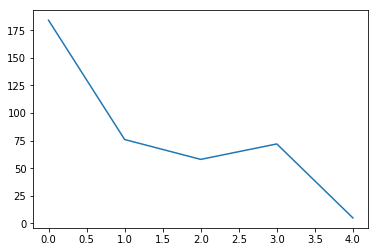

Percentage of gain: 1.1121939394300209
Total gain: 441.5409939537183
000000000000000000000000000000000000000000000000
Percentile:  0
[[108   1]
 [ 64  11]]
0.6467391304347826
Percentile:  1
[[12  0]
 [11 53]]
0.8552631578947368
Percentile:  2
[[ 1  0]
 [ 4 53]]
0.9310344827586207
Percentile:  3
[[72]]
1.0
Percentile:  4
[[5]]
1.0
000000000000000000000000000000000000000000000000
Working on... ADBE
9.848536613142013
0.002086767805344401
Diff in tren train and test
0.711958946898706
0.7223214285714286
F1,score 0.10760233918128656
G-score: 0.31875
Window: 200
[[311   0]
 [763  46]]
Vol pos 2.3516840304160698
Vol neg 3.572733755119044


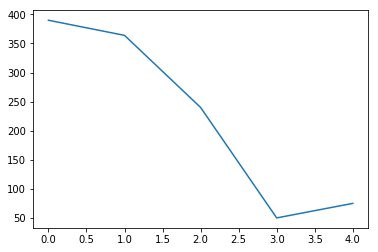

Percentage of gain: -1.6843255859797268
Total gain: -1886.444656297294
000000000000000000000000000000000000000000000000
Percentile:  0
[[147   0]
 [243   0]]
0.3769230769230769
Percentile:  1
[[121   0]
 [225  18]]
0.38186813186813184
Percentile:  2
[[ 42   0]
 [171  26]]
0.28451882845188287
Percentile:  3
[[ 0  0]
 [48  2]]
0.04
Percentile:  4
[[ 0  0]
 [75  0]]
0.0
000000000000000000000000000000000000000000000000
Working on... AMGN
5.841163444850075
0.007105975040131699
Diff in tren train and test
0.5219817005132783
0.7839285714285714
F1,score 0.7008019740900678
G-score: 0.5669642857142857
Window: 200
[[ 67 175]
 [310 568]]
Vol pos 2.422457018719824
Vol neg 2.2815051928760437


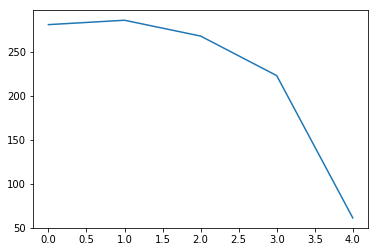

Percentage of gain: 0.38547338244839924
Total gain: 431.73018834220716
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 32  21]
 [116 116]]
0.519298245614035
Percentile:  1
[[ 12  31]
 [101 141]]
0.5368421052631579
Percentile:  2
[[ 15  48]
 [ 51 152]]
0.6278195488721805
Percentile:  3
[[  8  60]
 [ 29 124]]
0.5972850678733032
Percentile:  4
[[ 0 15]
 [12 34]]
0.5573770491803278
000000000000000000000000000000000000000000000000
Working on... TXN
9.594205774382367
0.0
Diff in tren train and test
0.6786431600089265
0.7205357142857143
F1,score 0.8369678089304257
G-score: 0.7196428571428571
Window: 200
[[  0 313]
 [  1 806]]
Vol pos 3.5858239280807203
Vol neg 1.9069673087985355


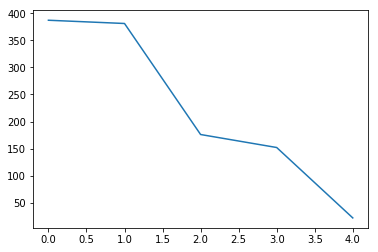

Percentage of gain: 2.0458806705985
Total gain: 2291.3863510703204
000000000000000000000000000000000000000000000000
Percentile:  0
[[  0 154]
 [  0 233]]
0.6020671834625323
Percentile:  1
[[  0 145]
 [  1 235]]
0.6167979002624672
Percentile:  2
[[  0  14]
 [  0 162]]
0.9204545454545454
Percentile:  3
[[152]]
1.0
Percentile:  4
[[22]]
1.0
000000000000000000000000000000000000000000000000
Working on... AVGO
9.981040657257227
0.0025934464021118834
Diff in tren train and test
0.4675295692925686
0.7
F1,score 0.676470588235294
G-score: 0.5285714285714286
Window: 200
[[ 40 296]
 [232 552]]
Vol pos 4.422628976086027
Vol neg 3.5954280890653703


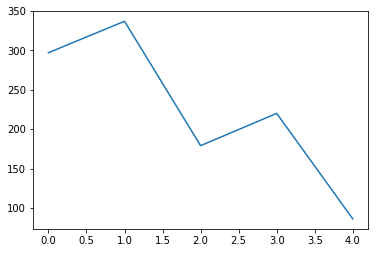

Percentage of gain: 0.6426877882289396
Total gain: 719.8103228164123
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 21  81]
 [ 81 113]]
0.4527027027027027
Percentile:  1
[[  9  77]
 [117 135]]
0.4260355029585799
Percentile:  2
[[  1  40]
 [ 23 114]]
0.6460674157303371
Percentile:  3
[[  5  67]
 [ 11 137]]
0.6454545454545455
Percentile:  4
[[ 4 31]
 [ 0 51]]
0.6395348837209303
000000000000000000000000000000000000000000000000
Working on... PYPL
11.940298507462696
0.005534927156825336
Diff in tren train and test
0.7344935296742525
0.7526785714285714
F1,score 0.30859375
G-score: 0.3678571428571429
Window: 200
[[254  23]
 [685 158]]
Vol pos 5.020230510871315
Vol neg 3.047826426723869


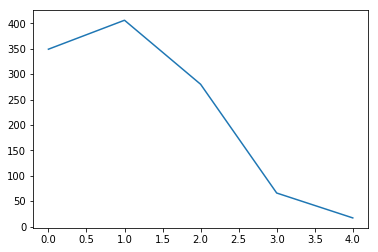

Percentage of gain: -0.079934053251355
Total gain: -89.5261396415176
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 56  12]
 [266  17]]
0.20797720797720798
Percentile:  1
[[ 70  11]
 [302  21]]
0.22524752475247525
Percentile:  2
[[ 75   0]
 [103 101]]
0.6308243727598566
Percentile:  3
[[49  0]
 [ 2 15]]
0.9696969696969697
Percentile:  4
[[ 4  0]
 [10  4]]
0.4444444444444444
000000000000000000000000000000000000000000000000
Working on... GILD
12.784895482130821
0.0
Diff in tren train and test
0.4758928571428571
0.49107142857142855
F1,score 0.6594724220623501
G-score: 0.4928571428571429
Window: 200
[[  2 568]
 [  0 550]]
Vol pos 3.3956603284045626
Vol neg 4.862567370866946


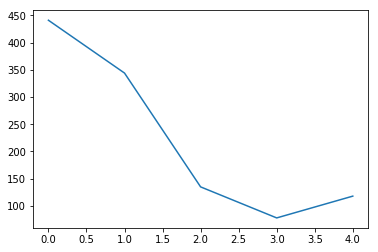

Percentage of gain: -0.7924408619402742
Total gain: -887.5337653731071
000000000000000000000000000000000000000000000000
Percentile:  0
[[  0 256]
 [  0 185]]
0.41950113378684806
Percentile:  1
[[  2 112]
 [  0 230]]
0.6744186046511628
Percentile:  2
[[  0   3]
 [  0 132]]
0.9777777777777777
Percentile:  3
[[ 0 78]
 [ 0  0]]
0.0
Percentile:  4
[[  0 118]
 [  0   0]]
0.0
000000000000000000000000000000000000000000000000
Working on... COST
5.257825954817153
0.0
Diff in tren train and test
0.677376171352075
0.7044642857142858
F1,score 0.17869415807560138
G-score: 0.35982142857142857
Window: 200
[[325   6]
 [711  78]]
Vol pos 1.0126499277069756
Vol neg 1.949639114804661


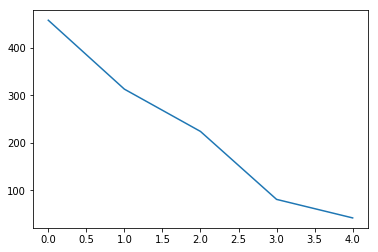

Percentage of gain: -0.8837440396866345
Total gain: -989.7933244490308
000000000000000000000000000000000000000000000000
Percentile:  0
[[232   6]
 [196  24]]
0.5589519650655022
Percentile:  1
[[ 88   0]
 [206  19]]
0.34185303514376997
Percentile:  2
[[  5   0]
 [198  21]]
0.11607142857142858
Percentile:  3
[[ 0  0]
 [75  6]]
0.07407407407407407
Percentile:  4
[[ 0  0]
 [34  8]]
0.19047619047619047
000000000000000000000000000000000000000000000000
Working on... QCOM
15.039417828987261
0.008409014463509178
Diff in tren train and test
0.47657295850066933
0.725
F1,score 0.6988265971316819
G-score: 0.5875
Window: 200
[[122 186]
 [276 536]]
Vol pos 4.901736823959164
Vol neg 4.056284907855755


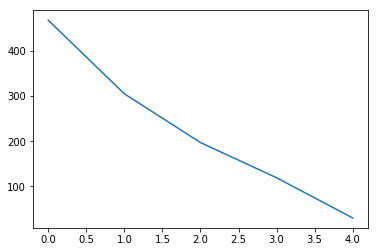

Percentage of gain: 1.2065528595855097
Total gain: 1351.3392027357709
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 72  60]
 [170 168]]
0.5106382978723404
Percentile:  1
[[ 36  35]
 [ 65 166]]
0.6688741721854304
Percentile:  2
[[  7  39]
 [ 39 112]]
0.6040609137055838
Percentile:  3
[[ 6 51]
 [ 1 61]]
0.5630252100840336
Percentile:  4
[[ 1  1]
 [ 0 28]]
0.9666666666666667
000000000000000000000000000000000000000000000000
Mean gain over portfolio :  -112.41296484112297


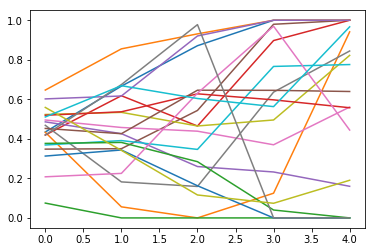

In [16]:
import warnings
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    o+=1
    xtemp=price
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    xtemp=normalize(xtemp,axis=0,norm='max')
    #print(xtemp)
    accintime=[]
    trendwindowtime=[200]
    f1total=[]
    acctotal=[]
    auctotal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        

        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        yvolatility=[]
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            
            if(s==-1):
                
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            x.append(xtemp[i])
        y=np.array(y)
        yvolatility=np.array(yvolatility)
        x=np.array(x)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)
        cspace=np.logspace(-4,4,10)
        gspace=np.logspace(-4,4,10)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    prediction=rbf_svm.predict(x_val)
                    
                    cvacclist.append(rbf_svm.score(x_val,y_val))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        rbf_svm=svm.SVC(kernel='rbf',C=maxc, gamma=maxg )
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
            else:
                voln.append(yvolatilitytest[j])
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=rbf_svm.score(x_test,y_test)
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rbf_svm.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        

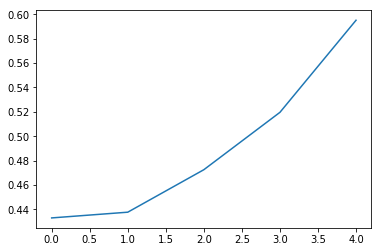

In [17]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()